In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
from PIL import Image
import requests
from io import BytesIO
import plotly.express as px

# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette("husl")

# Загрузка данных
#train_df = pd.read_parquet('/content/sample_data/hackaton_train_types_recom.parquet')
#test_df = pd.read_parquet('/content/sample_data/hackaton_test_types_recom.parquet')

test_df = pd.read_parquet('../data/hackaton_test_types_recom.parquet', use_nullable_dtypes=False)
train_df = pd.read_parquet('../data/hackaton_train_types_recom.parquet', use_nullable_dtypes=False)

# Функция для загрузки и анализа изображений (выборочно)
def analyze_sample_images(df, column='main_photo', sample_size=5):
    print(f"\nАнализ изображений (примеры из колонки '{column}'):")
    sample_urls = df[column].dropna().sample(sample_size).values

    fig, axes = plt.subplots(1, sample_size, figsize=(20, 5))
    if sample_size == 1:
        axes = [axes]

    for i, url in enumerate(sample_urls):
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"Пример {i+1}\n{url.split('/')[-1]}", fontsize=8)
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Ошибка загрузки\n{str(e)}",
                        ha='center', va='center')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Функция для анализа текстовых данных
def analyze_text_data(df, text_column='name'):
    print(f"\nАнализ текстовых данных (колонка '{text_column}'):")

    # Длина текста
    df['text_length'] = df[text_column].str.len()

    # Количество слов
    df['word_count'] = df[text_column].str.split().str.len()

    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df['text_length'], bins=50, ax=axes[0])
    axes[0].set_title('Распределение длины текста')

    sns.histplot(df['word_count'], bins=50, ax=axes[1])
    axes[1].set_title('Распределение количества слов')
    plt.show()

    # Примеры текстов
    print("\nПримеры текстовых описаний:")
    for text in df[text_column].sample(5).values:
        print(f"- {text[:200]}..." if len(text) > 200 else f"- {text}")

    return df

# Функция для базового анализа датафрейма
def basic_eda(df, name):
    print(f"\n{'='*50}")
    print(f"Базовый анализ: {name}")
    print(f"{'='*50}\n")

    # 1. Общая информация
    print("1. Общая информация:")
    display(df.info(verbose=True))

    # 2. Статистика по числовым колонкам
    print("\n2. Описательная статистика (числовые колонки):")
    display(df.describe(include=[np.number]).T)

    # 3. Статистика по категориальным колонкам
    print("\n3. Описательная статистика (категориальные колонки):")
    display(df.describe(include=['object', 'category', 'bool']).T)

    # 4. Пропущенные значения
    print("\n4. Пропущенные значения:")
    missing = df.isnull().sum().sort_values(ascending=False)
    missing = missing[missing > 0]
    if len(missing) > 0:
        display(missing.to_frame(name='Количество пропусков'))
    else:
        print("Пропущенных значений нет.")

    # 5. Уникальные значения для категориальных колонок
    print("\n5. Уникальные значения категориальных колонок:")
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} уникальных значений")
        if unique_vals <= 20:
            print(f"   {df[col].unique()}")

    # 6. Дубликаты
    print(f"\n6. Дубликаты: {df.duplicated().sum()} полных дубликатов")



### Анализ Тренировочного набора данных

In [4]:

# Этап 1: Базовый анализ данных
print("="*50)
print("ЭТАП 1: БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("="*50)
basic_eda(train_df, "Тренировочный набор")

#basic_eda(test_df, "Тестовый набор")

ЭТАП 1: БАЗОВЫЙ АНАЛИЗ ДАННЫХ

Базовый анализ: Тренировочный набор

1. Общая информация:
<class 'pandas.core.frame.DataFrame'>
Index: 763013 entries, 6762112 to 724995
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   main_photo       763013 non-null  object
 1   name             763013 non-null  object
 2   type             763013 non-null  object
 3   category_l2      442407 non-null  object
 4   category_l4      442407 non-null  object
 5   is_markup        763013 non-null  bool  
 6   target           763013 non-null  int64 
 7   stratify_column  763013 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 47.3+ MB


None


2. Описательная статистика (числовые колонки):


count      mean      std  min  25%  50%  75%  max
target  763013.0  0.503145  0.49999  0.0  0.0  1.0  1.0  1.0


3. Описательная статистика (категориальные колонки):


count  unique                                                top    freq
main_photo       763013  501598  https://cdn1.ozone.ru/s3/multimedia-1-p/693123...     693
name             763013  489529                                    Комплект одежды     922
type             763013   19981                                            Картина   24143
category_l2      442407      28                                          Дом и сад   85209
category_l4      442407    3381                                            Картина   24323
is_markup        763013       2                                              False  560002
stratify_column  763013     108                                        nan_False_0  223098


4. Пропущенные значения:


Количество пропусков
category_l2                320606
category_l4                320606


5. Уникальные значения категориальных колонок:
main_photo: 501598 уникальных значений
name: 489529 уникальных значений
type: 19981 уникальных значений
category_l2: 28 уникальных значений
category_l4: 3381 уникальных значений
stratify_column: 108 уникальных значений

6. Дубликаты: 47730 полных дубликатов



ЭТАП 2: АНАЛИЗ ИЗОБРАЖЕНИЙ

Анализ изображений (примеры из колонки 'main_photo'):


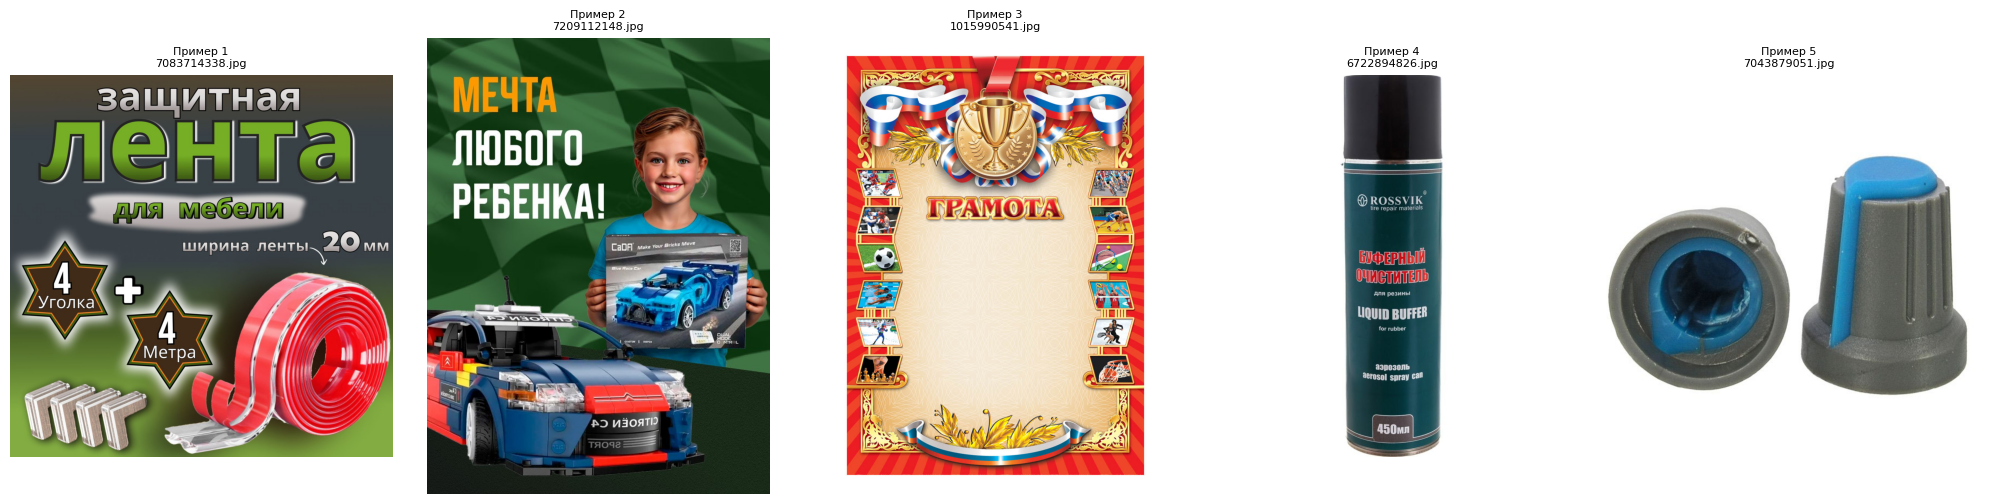

In [3]:
# Этап 2: Анализ изображений
print("\n" + "="*50)
print("ЭТАП 2: АНАЛИЗ ИЗОБРАЖЕНИЙ")
print("="*50)
analyze_sample_images(train_df)


ЭТАП 3: АНАЛИЗ ТЕКСТОВЫХ ДАННЫХ

Анализ текстовых данных (колонка 'name'):


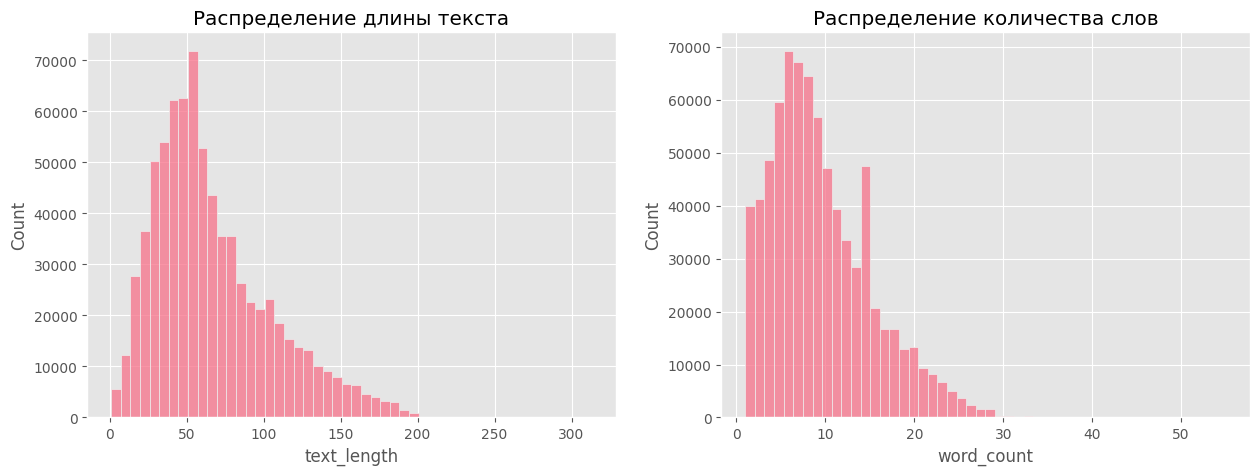


Примеры текстовых описаний:
- Юбка Calvin Klein Jeans POCKETS, кремовый, 44
- Лак паркетный алкидно-уретановый Parade L10 2,5л, матовый
- Игра Железный человек (PlayStation 2, Английская версия)
- Матрас Dimax Практик 28 95х180
- Футболка Анадырь


In [5]:
# Этап 3: Анализ текстовых данных
print("\n" + "="*50)
print("ЭТАП 3: АНАЛИЗ ТЕКСТОВЫХ ДАННЫХ")
print("="*50)
train_df = analyze_text_data(train_df)


ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ


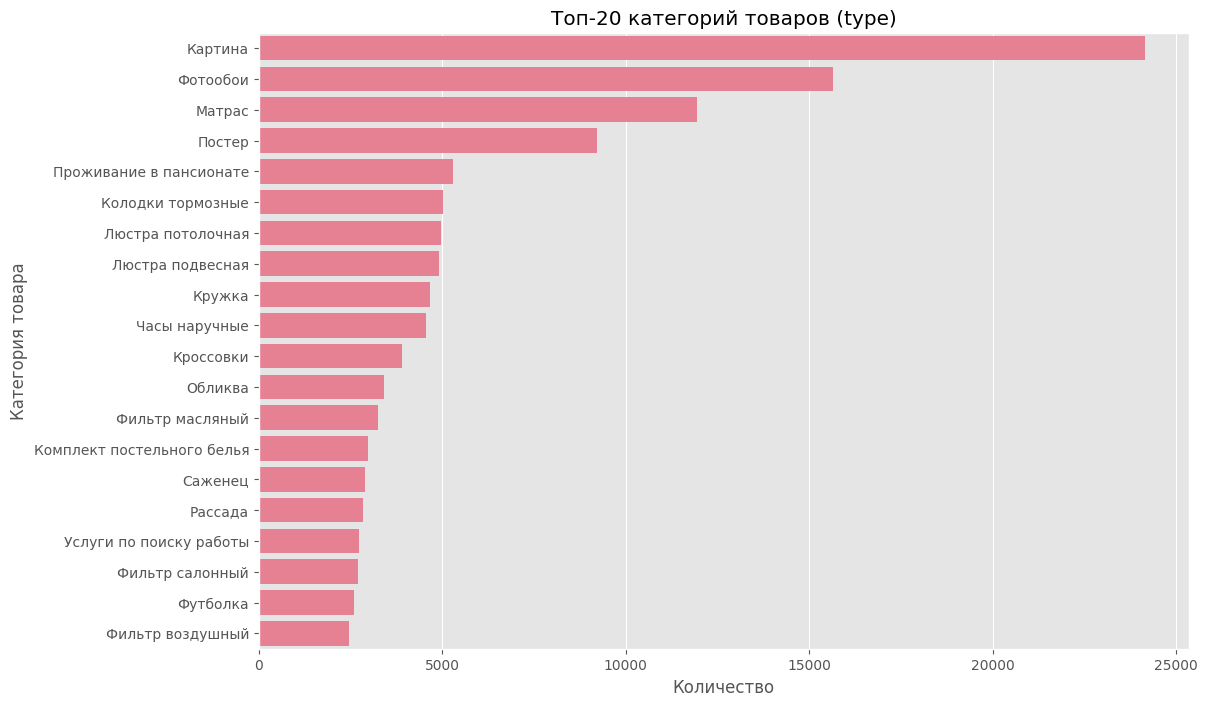

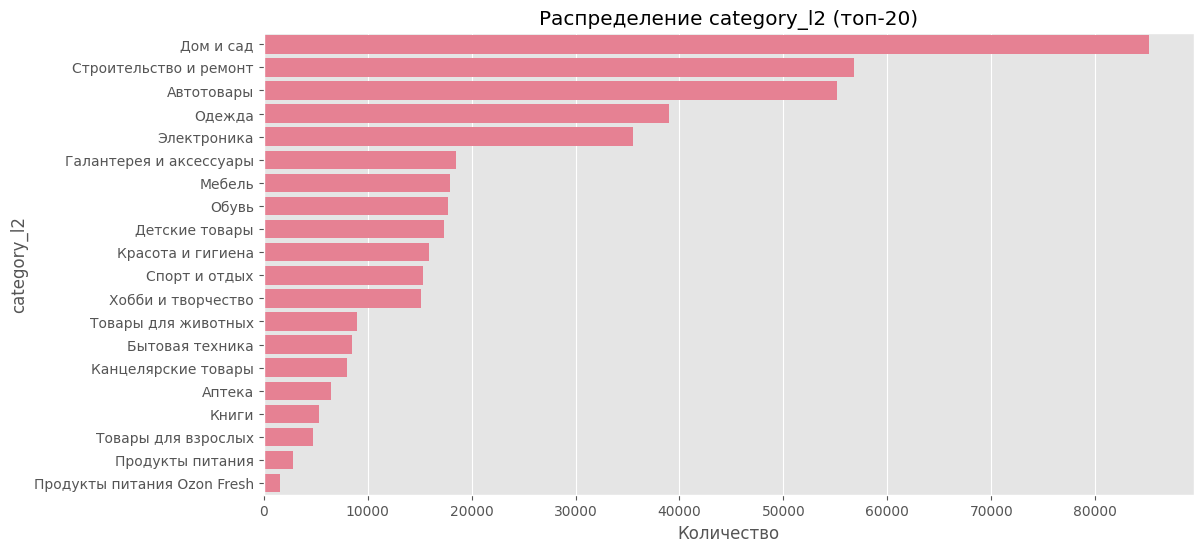

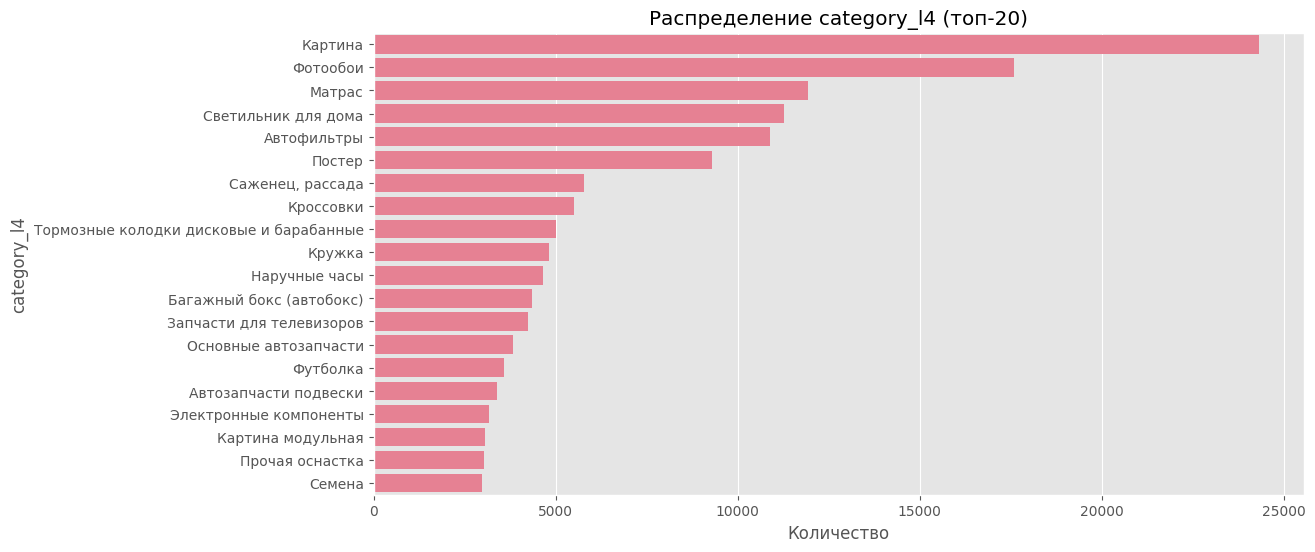

In [5]:
# Этап 4: Анализ категориальных переменных train_df
print("\n" + "="*50)
print("ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ")
print("="*50)

# Анализ целевой переменной type
plt.figure(figsize=(12, 8))
type_counts = train_df['type'].value_counts()

if len(type_counts) > 20:
    # Для большого количества категорий покажем топ-20
    type_counts = type_counts.head(20)
    plt.title('Топ-20 категорий товаров (type)')
else:
    plt.title('Распределение категорий товаров (type)')

sns.barplot(y=type_counts.index, x=type_counts.values)
plt.xlabel('Количество')
plt.ylabel('Категория товара')
plt.show()

# Анализ category_l2 и category_l4
for col in ['category_l2', 'category_l4']:
    if col in train_df.columns:
        plt.figure(figsize=(12, 6))
        counts = train_df[col].value_counts().head(20)
        sns.barplot(y=counts.index, x=counts.values)
        plt.title(f'Распределение {col} (топ-20)')
        plt.xlabel('Количество')
        plt.ylabel(col)
        plt.show()


In [10]:
from collections import Counter

# Пример: топ-10 слов в названиях для target=1 и target=0
if 'name' in train_df.columns and 'target' in train_df.columns:
    words_target1 = ' '.join(train_df[train_df['target'] == 1]['name'].dropna()).split()
    words_target0 = ' '.join(train_df[train_df['target'] == 0]['name'].dropna()).split()

    top_words1 = Counter(words_target1).most_common(10)
    top_words0 = Counter(words_target0).most_common(10)

    print("Топ-10 слов для target=1:", top_words1)
    print("Топ-10 слов для target=0:", top_words0)

Топ-10 слов для target=1: [('для', 153378), ('на', 109426), ('с', 74542), ('и', 53513), ('см.', 49852), ('в', 47897), ('холсте', 26343), ('интерьера', 24544), ('подрамнике', 20871), ('стену', 20021)]
Топ-10 слов для target=0: [('для', 181142), ('с', 53352), ('и', 38578), ('на', 34154), ('в', 20789), ('см', 20747), ('-', 16148), ('1', 16142), ('/', 14955), ('2', 13938)]



ЭТАП 5: АНАЛИЗ БИНАРНЫХ ПЕРЕМЕННЫХ


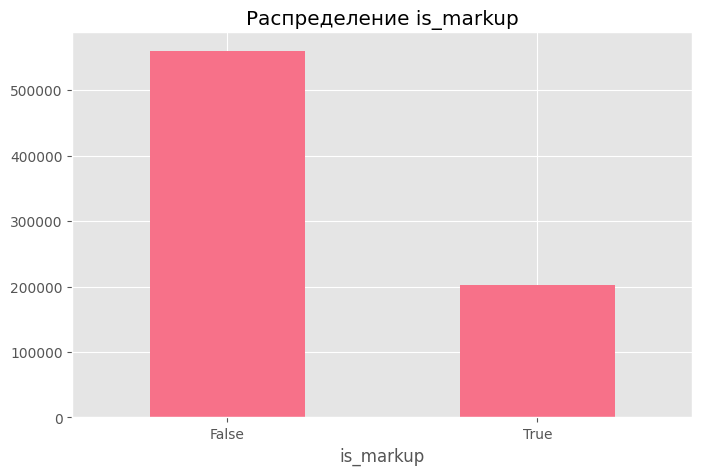

Процент
is_markup          
False      0.733935
True       0.266065

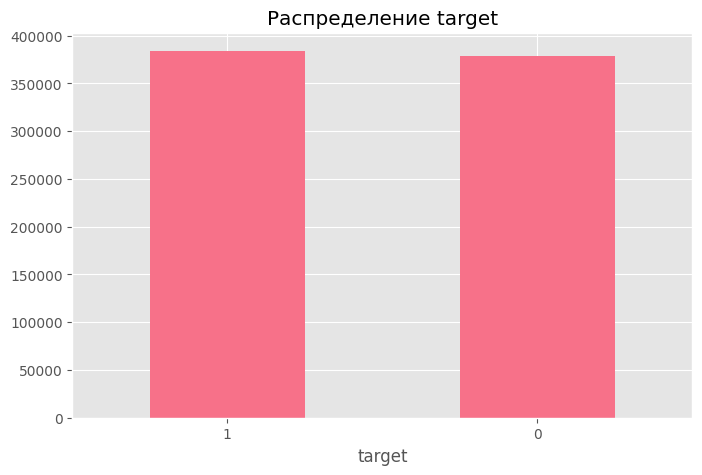

Процент
target          
1       0.503145
0       0.496855

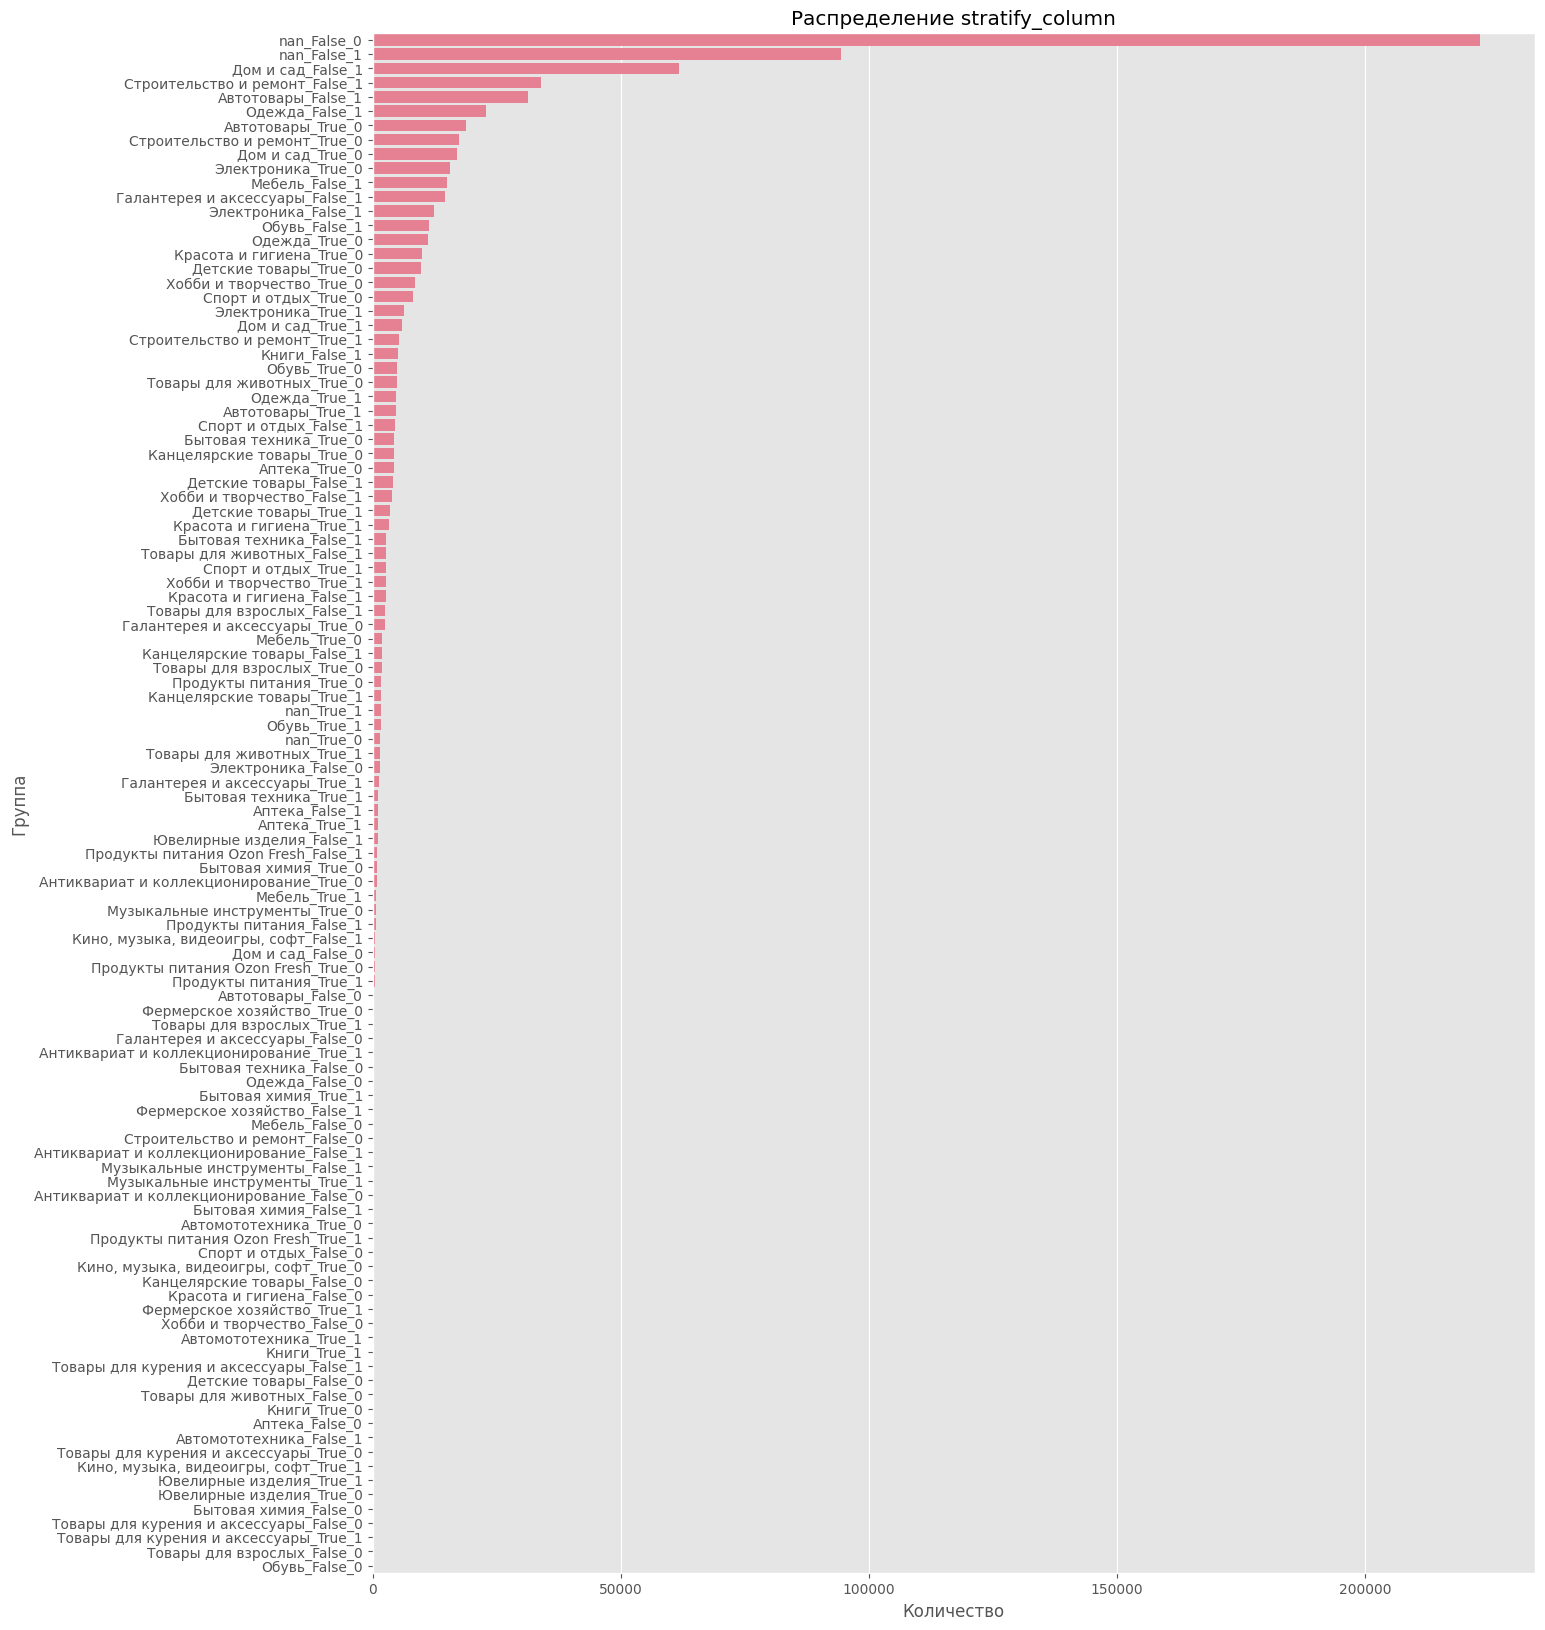

In [8]:
# Этап 5: Анализ бинарных переменных
print("\n" + "="*50)
print("ЭТАП 5: АНАЛИЗ БИНАРНЫХ ПЕРЕМЕННЫХ")
print("="*50)

for col in ['is_markup', 'target']:
    if col in train_df.columns:
        plt.figure(figsize=(8, 5))
        train_df[col].value_counts().plot(kind='bar')
        plt.title(f'Распределение {col}')
        plt.xticks(rotation=0)
        plt.show()

        # Процентное соотношение
        display(train_df[col].value_counts(normalize=True).to_frame('Процент'))

# Анализ stratify_column
if 'stratify_column' in train_df.columns:
    plt.figure(figsize=(15, 20))
    stratify_counts = train_df['stratify_column'].value_counts()
    sns.barplot(y=stratify_counts.index, x=stratify_counts.values)
    plt.title('Распределение stratify_column')
    plt.xlabel('Количество')
    plt.ylabel('Группа')
    plt.show()

In [ ]:
# # Этап 6: Анализ взаимосвязей
# print("\n" + "="*50)
# print("ЭТАП 6: АНАЛИЗ ВЗАИМОСВЯЗЕЙ")
# print("="*50)
# # Связь между type и category_l2 (если есть)
# if all(col in train_df.columns for col in ['type', 'category_l2']):
#     # Для визуализации возьмем топ-5 категорий по type
#     top_types = train_df['type'].value_counts().head(5).index

#     plt.figure(figsize=(15, 8))
#     sns.countplot(data=train_df[train_df['type'].isin(top_types)],
#                  y='type', hue='category_l2',
#                  order=top_types)
#     plt.title('Связь между type и category_l2 (топ-5 категорий)')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

# # Связь между target и другими переменными
# if 'target' in train_df.columns:
#     # С type
#     if 'type' in train_df.columns:
#         plt.figure(figsize=(12, 8))
#         sns.countplot(data=train_df, y='type', hue='target')
#         plt.title('Распределение target по type')
#         plt.show()

#     # С is_markup
#     if 'is_markup' in train_df.columns:
#         plt.figure(figsize=(8, 5))
#         sns.countplot(data=train_df, x='is_markup', hue='target')
#         plt.title('Распределение target по is_markup')
#         plt.show()


ЭТАП 6: АНАЛИЗ ВЗАИМОСВЯЗЕЙ


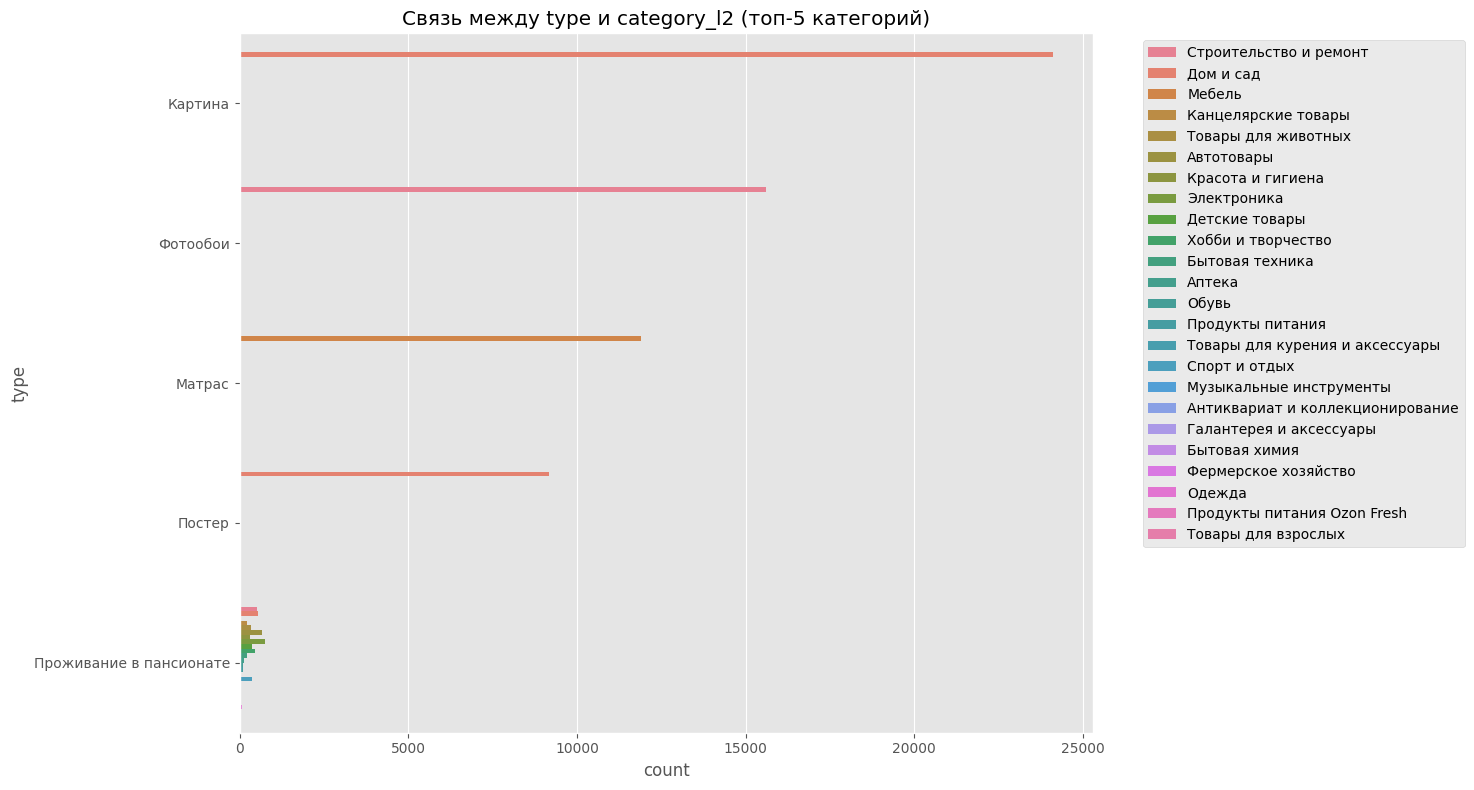

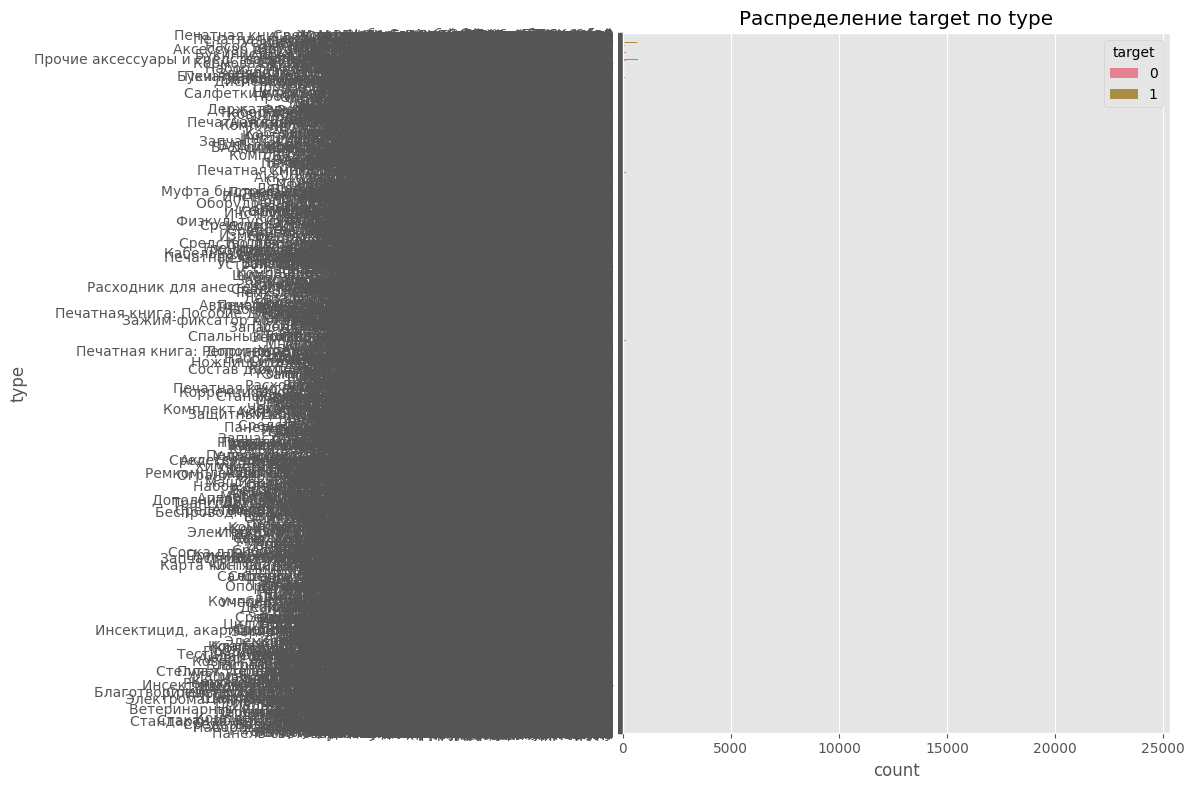

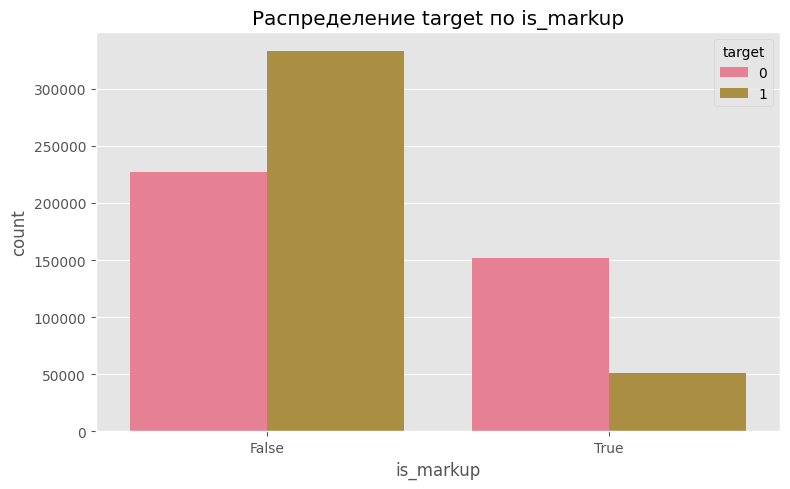

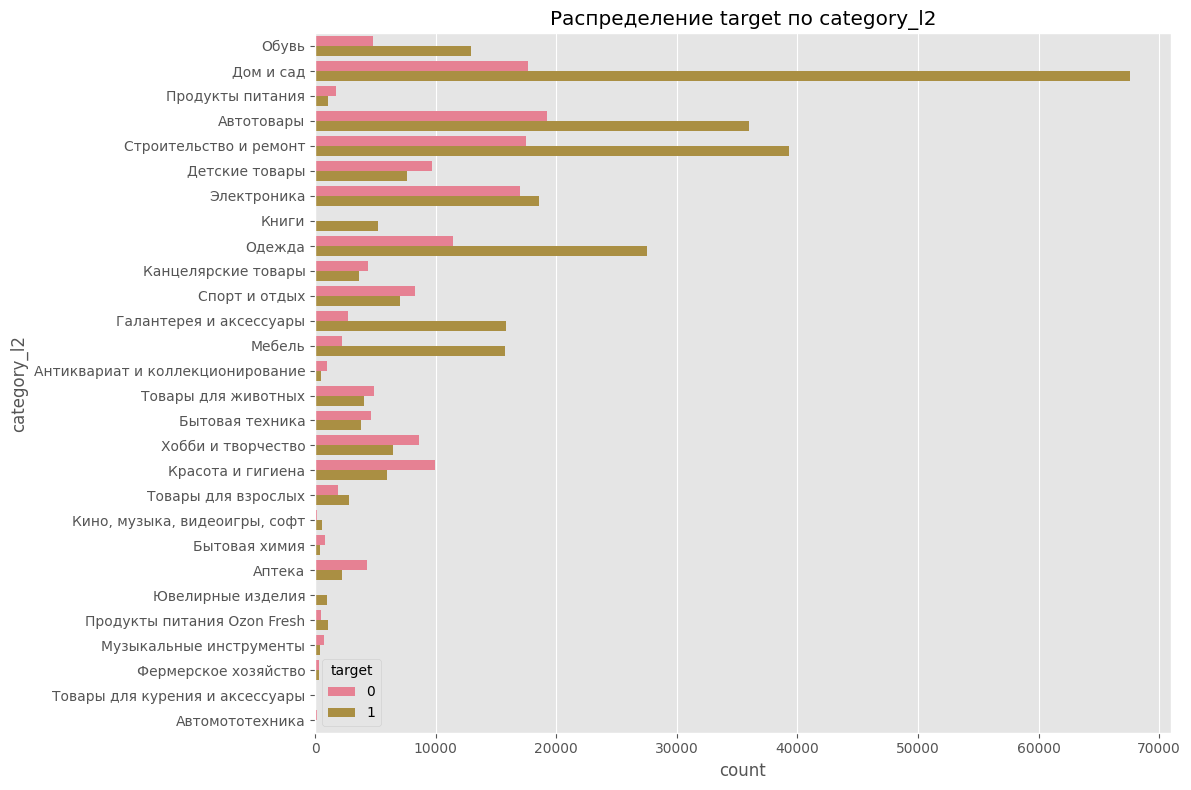

In [7]:
# Этап 6: Анализ взаимосвязей
print("\n" + "="*50)
print("ЭТАП 6: АНАЛИЗ ВЗАИМОСВЯЗЕЙ")
print("="*50)

# Связь между type и category_l2 (если есть)
if all(col in train_df.columns for col in ['type', 'category_l2']):
    # Для визуализации возьмем топ-5 категорий по type
    top_types = train_df['type'].value_counts().head(5).index

    # Фильтруем данные, оставляя только записи с заполненными category_l2
    filtered_df = train_df[train_df['type'].isin(top_types) & ~train_df['category_l2'].isna()]

    if not filtered_df.empty:
        plt.figure(figsize=(15, 8))
        sns.countplot(data=filtered_df,
                     y='type', hue='category_l2',
                     order=top_types)
        plt.title('Связь между type и category_l2 (топ-5 категорий)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("Нет данных для отображения связи между type и category_l2")

# Связь между target и другими переменными
if 'target' in train_df.columns:
    # С type
    if 'type' in train_df.columns:
        plt.figure(figsize=(12, 8))
        sns.countplot(data=train_df, y='type', hue='target')
        plt.title('Распределение target по type')
        plt.tight_layout()
        plt.show()

    # С is_markup
    if 'is_markup' in train_df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=train_df, x='is_markup', hue='target')
        plt.title('Распределение target по is_markup')
        plt.tight_layout()
        plt.show()

    # Дополнительно: связь между target и category_l2 (если есть)
    if 'category_l2' in train_df.columns and not train_df['category_l2'].isna().all():
        plt.figure(figsize=(12, 8))
        sns.countplot(data=train_df[~train_df['category_l2'].isna()],
                     y='category_l2', hue='target')
        plt.title('Распределение target по category_l2')
        plt.tight_layout()
        plt.show()
else:
    print("Столбец 'target' отсутствует в данных, анализ взаимосвязей невозможен")

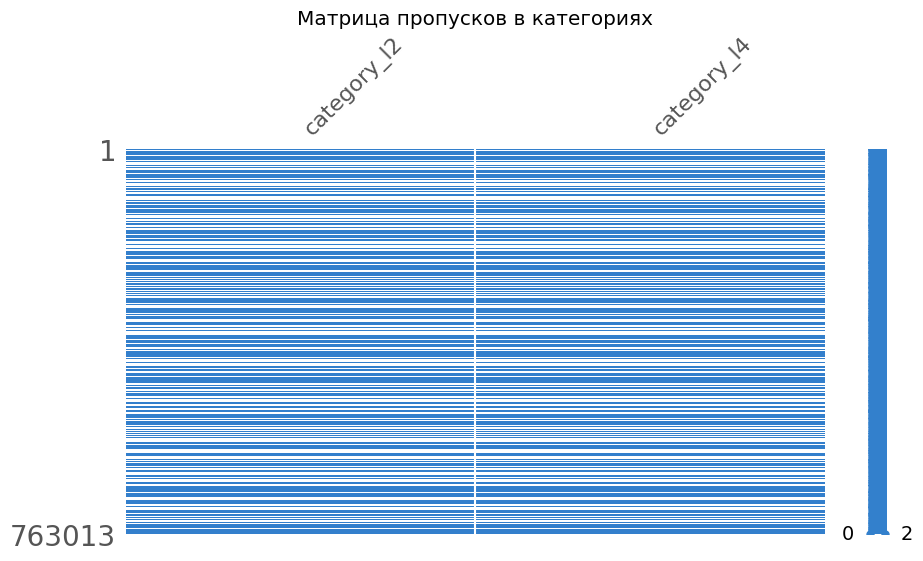

In [24]:
# Матрица пропусков для category_l2 и category_l4 (если они есть)
import missingno as msno
cols_to_check = ['category_l2', 'category_l4']  # Добавьте другие столбцы при необходимости
existing_cols = [col for col in cols_to_check if col in train_df.columns]

if existing_cols:
    msno.matrix(train_df[existing_cols], figsize=(10, 5), color=(0.2, 0.5, 0.8))
    plt.title('Матрица пропусков в категориях')
    plt.show()
else:
    print(f"Столбцы {cols_to_check} отсутствуют в данных.")


### Анализ Тренировочного набора данных

In [26]:

# Этап 1: Базовый анализ данных
print("="*50)
print("ЭТАП 1: БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("="*50)


basic_eda(test_df, "Тестовый набор")

ЭТАП 1: БАЗОВЫЙ АНАЛИЗ ДАННЫХ

Базовый анализ: Тестовый набор

1. Общая информация:
<class 'pandas.core.frame.DataFrame'>
Index: 190754 entries, 7809846 to 6192728
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   main_photo       190754 non-null  object
 1   name             190754 non-null  object
 2   type             190754 non-null  object
 3   category_l2      110603 non-null  object
 4   category_l4      110603 non-null  object
 5   is_markup        190754 non-null  bool  
 6   target           190754 non-null  int64 
 7   stratify_column  190754 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 11.8+ MB


None


2. Описательная статистика (числовые колонки):


count      mean       std  min  25%  50%  75%  max
target  190754.0  0.503145  0.499991  0.0  0.0  1.0  1.0  1.0


3. Описательная статистика (категориальные колонки):


count  unique                                                top    freq
main_photo       190754  151879  https://cdn1.ozone.ru/s3/multimedia-1-p/693123...     177
name             190754  150393                                    Комплект одежды     220
type             190754   17778                                            Картина    5978
category_l2      110603      28                                          Дом и сад   21301
category_l4      110603    3066                                            Картина    6031
is_markup        190754       2                                              False  139998
stratify_column  190754     107                                        nan_False_0   55774


4. Пропущенные значения:


Количество пропусков
category_l2                 80151
category_l4                 80151


5. Уникальные значения категориальных колонок:
main_photo: 151879 уникальных значений
name: 150393 уникальных значений
type: 17778 уникальных значений
category_l2: 28 уникальных значений
category_l4: 3066 уникальных значений
stratify_column: 107 уникальных значений

6. Дубликаты: 5221 полных дубликатов



ЭТАП 2: АНАЛИЗ ИЗОБРАЖЕНИЙ

Анализ изображений (примеры из колонки 'main_photo'):


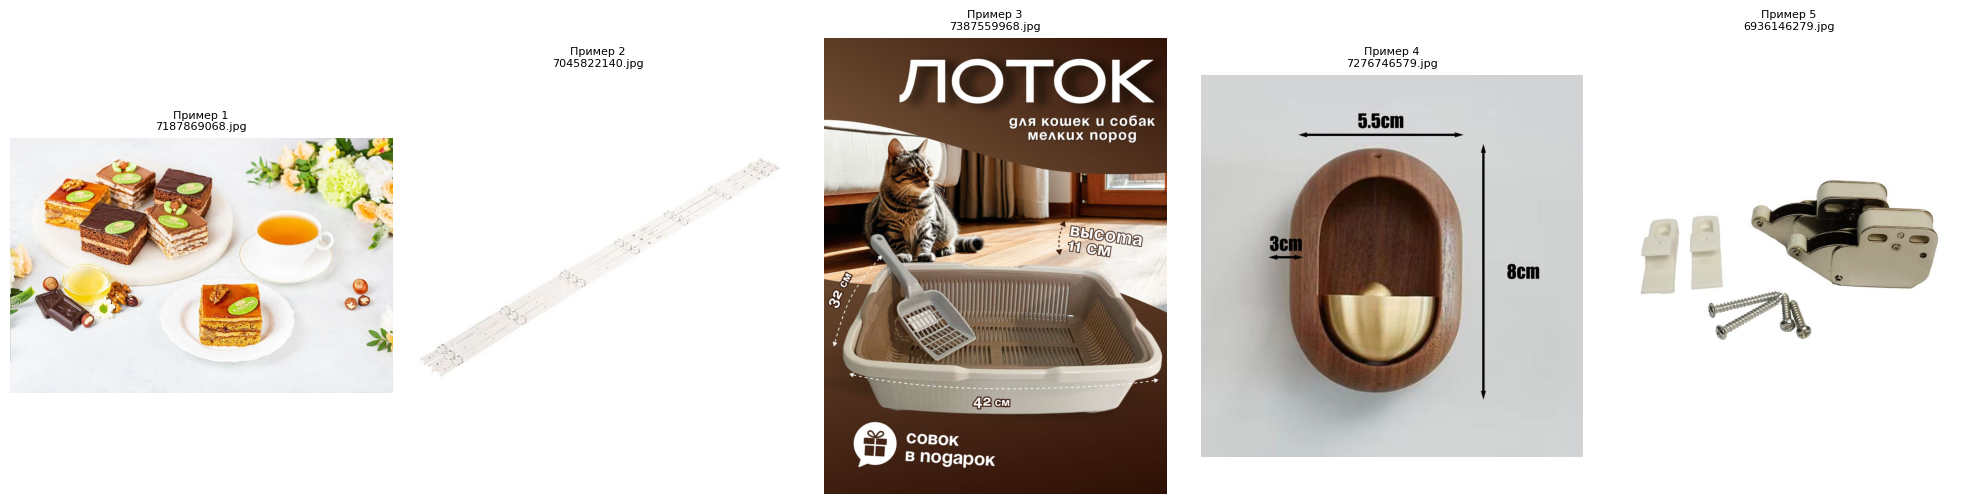

In [27]:
# Этап 2: Анализ изображений
print("\n" + "="*50)
print("ЭТАП 2: АНАЛИЗ ИЗОБРАЖЕНИЙ")
print("="*50)
analyze_sample_images(test_df)


ЭТАП 3: АНАЛИЗ ТЕКСТОВЫХ ДАННЫХ

Анализ текстовых данных (колонка 'name'):


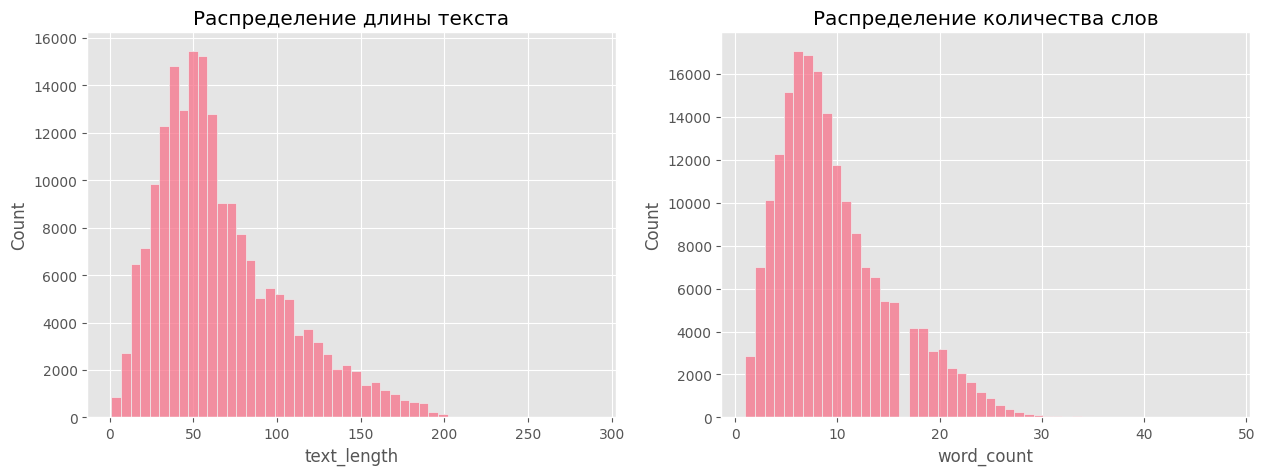


Примеры текстовых описаний:
- Фильтр воздушный для Сеат Леон 1999-2006, Seat Leon фильтр воздушный SAKURA A-31170, oem 1F0129620
- Защита зубной щетки
- Набор кофейный на 6 персон 12 предметов (чашка 110мл, блюдце), белый, фарфоровый, подарочная упаковка
- Колодки тормозные дисковые задние для Тойота Королла 120 хетчбек 2002-2007, Toyota Corolla 120 хэтчбек колодки тормозные дисковые задние STELLOX 1058 002-SX, oem 0446605010
- Кухня, ресторан, чайный магазин, цветочный магазин, кафе.


In [28]:
# Этап 3: Анализ текстовых данных
print("\n" + "="*50)
print("ЭТАП 3: АНАЛИЗ ТЕКСТОВЫХ ДАННЫХ")
print("="*50)
train_df = analyze_text_data(test_df)


ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ


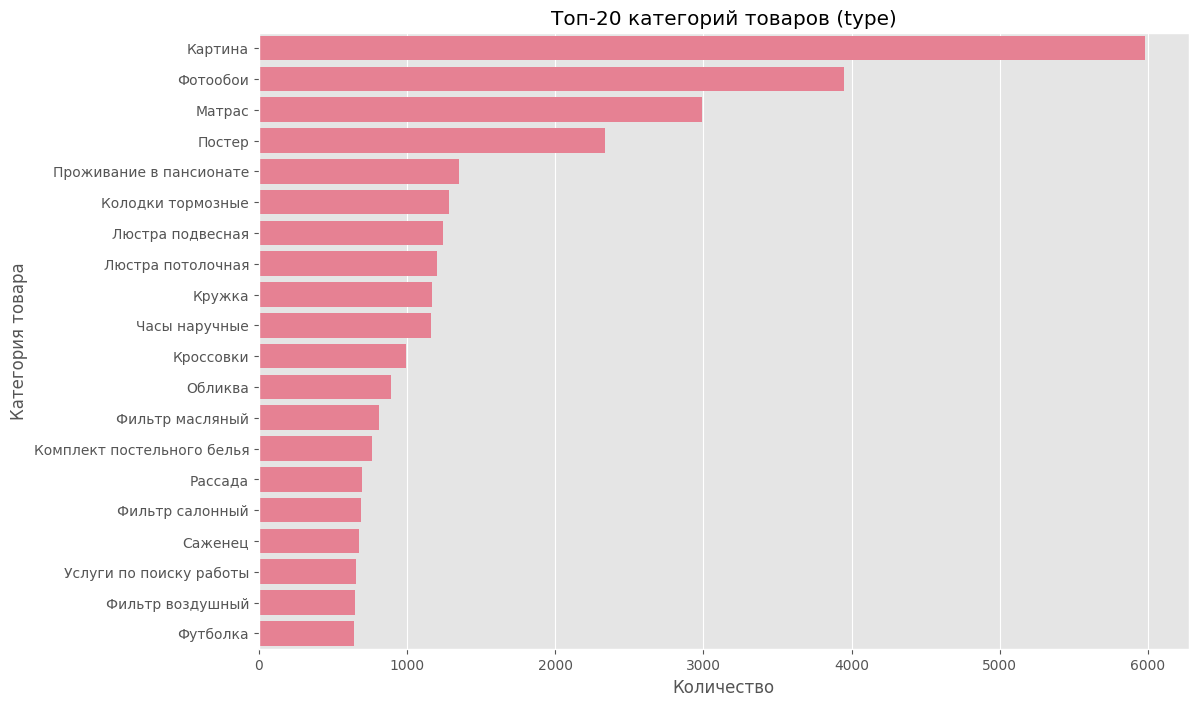

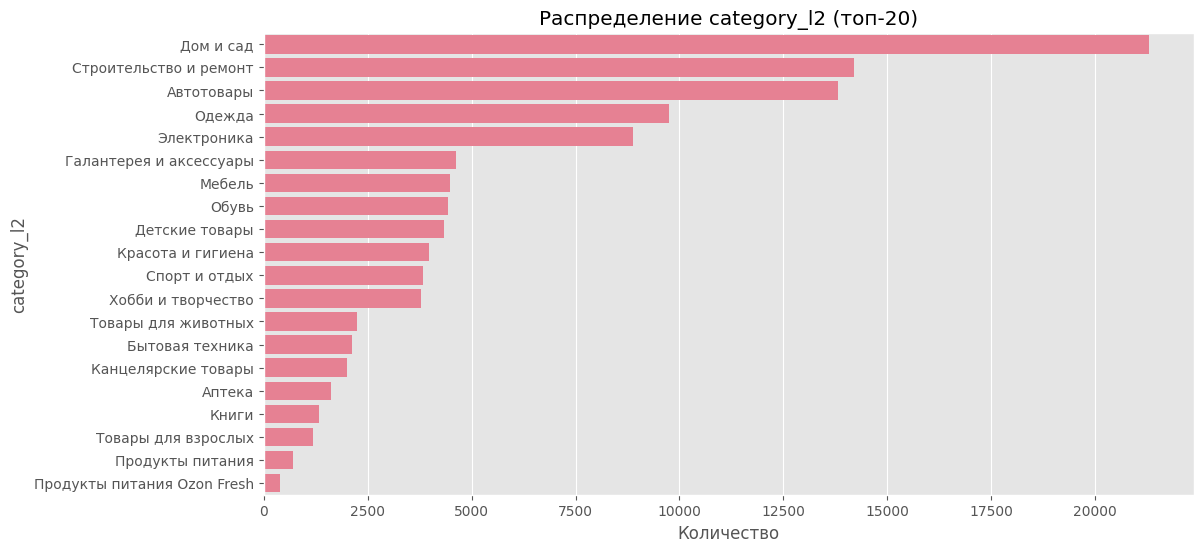

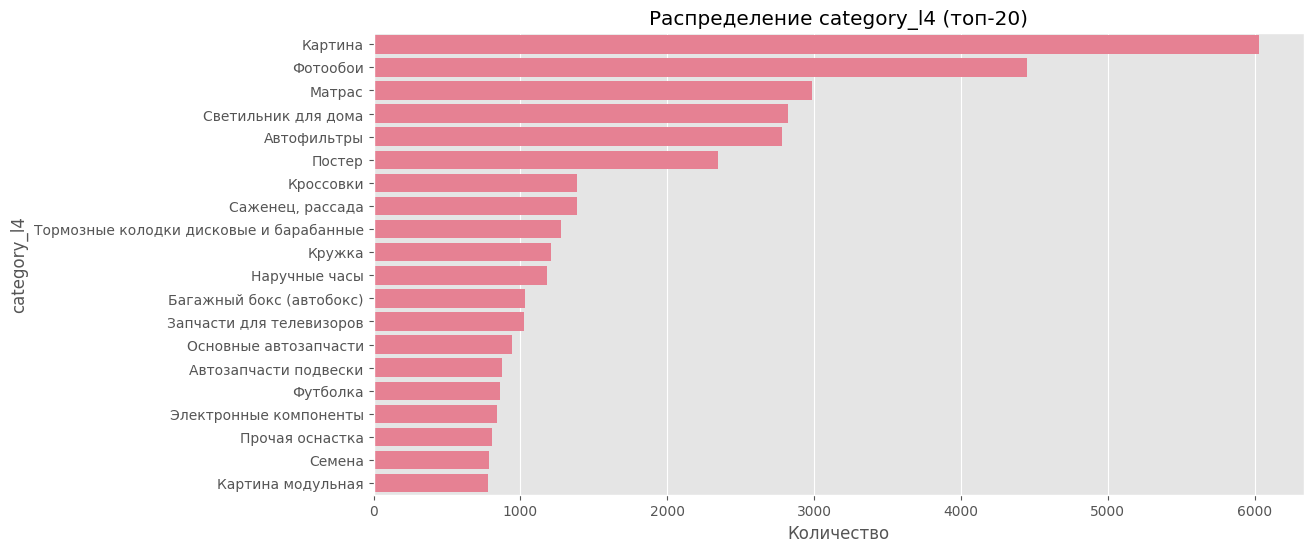

In [29]:
# Этап 4: Анализ категориальных переменных test_df
print("\n" + "="*50)
print("ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ")
print("="*50)

# Анализ целевой переменной type
plt.figure(figsize=(12, 8))
type_counts = test_df['type'].value_counts()

if len(type_counts) > 20:
    # Для большого количества категорий покажем топ-20
    type_counts = type_counts.head(20)
    plt.title('Топ-20 категорий товаров (type)')
else:
    plt.title('Распределение категорий товаров (type)')

sns.barplot(y=type_counts.index, x=type_counts.values)
plt.xlabel('Количество')
plt.ylabel('Категория товара')
plt.show()

# Анализ category_l2 и category_l4
for col in ['category_l2', 'category_l4']:
    if col in test_df.columns:
        plt.figure(figsize=(12, 6))
        counts = test_df[col].value_counts().head(20)
        sns.barplot(y=counts.index, x=counts.values)
        plt.title(f'Распределение {col} (топ-20)')
        plt.xlabel('Количество')
        plt.ylabel(col)
        plt.show()


In [31]:
from collections import Counter

# Пример: топ-10 слов в названиях для target=1 и target=0
if 'name' in test_df.columns and 'target' in test_df.columns:
    words_target1 = ' '.join(test_df[test_df['target'] == 1]['name'].dropna()).split()
    words_target0 = ' '.join(test_df[test_df['target'] == 0]['name'].dropna()).split()

    top_words1 = Counter(words_target1).most_common(10)
    top_words0 = Counter(words_target0).most_common(10)

    print("Топ-10 слов для target=1:", top_words1)
    print("Топ-10 слов для target=0:", top_words0)

Топ-10 слов для target=1: [('для', 38509), ('на', 27168), ('с', 18396), ('и', 13428), ('см.', 12479), ('в', 12016), ('холсте', 6540), ('интерьера', 6031), ('подрамнике', 5150), ('стену', 5003)]
Топ-10 слов для target=0: [('для', 44857), ('с', 13296), ('и', 9395), ('на', 8515), ('см', 5242), ('в', 5211), ('1', 4118), ('-', 4004), ('/', 3915), ('шт', 3487)]



ЭТАП 5: АНАЛИЗ БИНАРНЫХ ПЕРЕМЕННЫХ


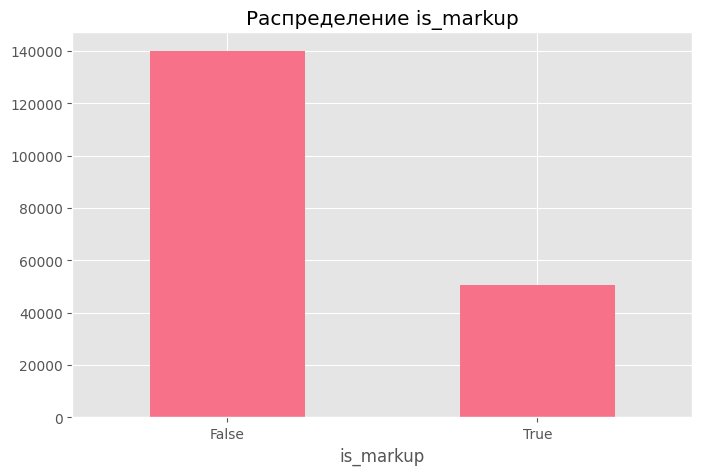

Процент
is_markup          
False      0.733919
True       0.266081

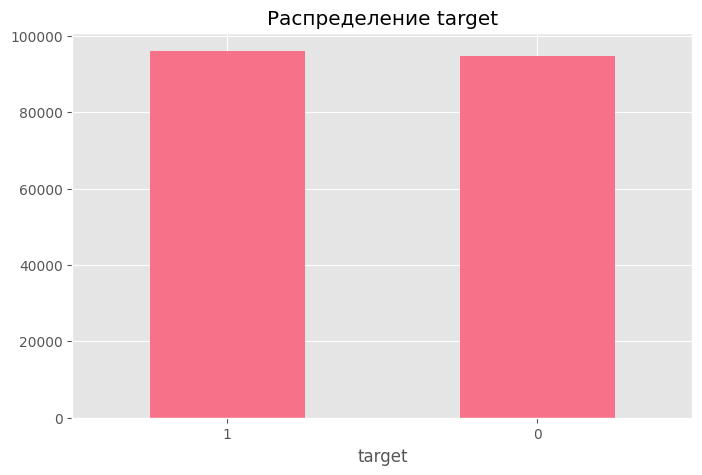

Процент
target          
1       0.503145
0       0.496855

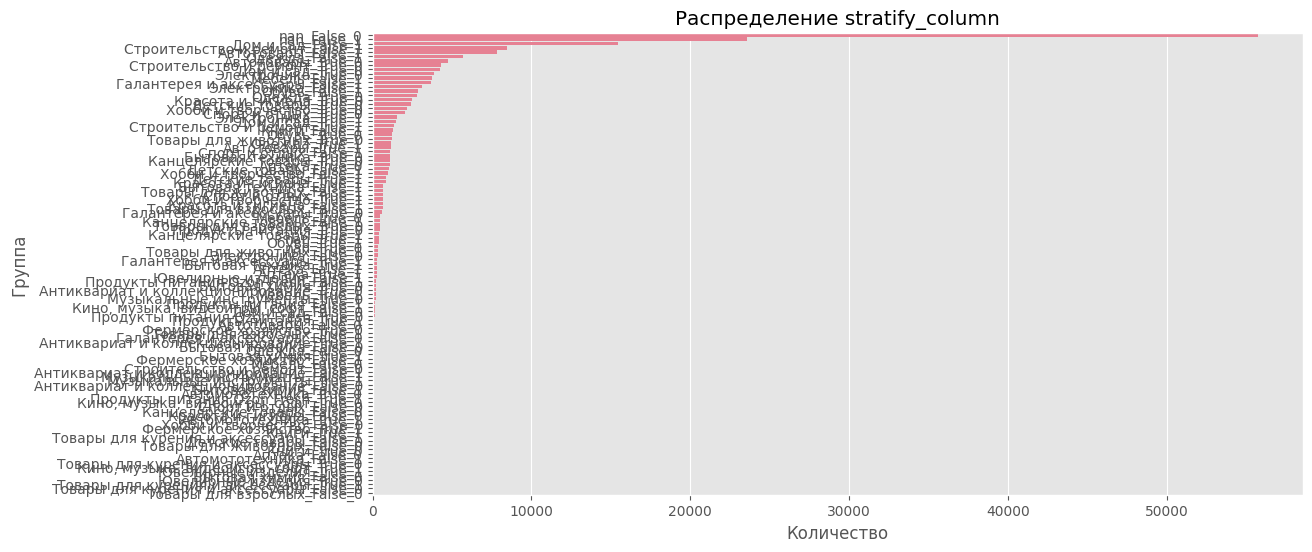

In [32]:
# Этап 5: Анализ бинарных переменных
print("\n" + "="*50)
print("ЭТАП 5: АНАЛИЗ БИНАРНЫХ ПЕРЕМЕННЫХ")
print("="*50)

for col in ['is_markup', 'target']:
    if col in test_df.columns:
        plt.figure(figsize=(8, 5))
        test_df[col].value_counts().plot(kind='bar')
        plt.title(f'Распределение {col}')
        plt.xticks(rotation=0)
        plt.show()

        # Процентное соотношение
        display(test_df[col].value_counts(normalize=True).to_frame('Процент'))

# Анализ stratify_column
if 'stratify_column' in test_df.columns:
    plt.figure(figsize=(12, 6))
    stratify_counts = test_df['stratify_column'].value_counts()
    sns.barplot(y=stratify_counts.index, x=stratify_counts.values)
    plt.title('Распределение stratify_column')
    plt.xlabel('Количество')
    plt.ylabel('Группа')
    plt.show()


ЭТАП 6: АНАЛИЗ ВЗАИМОСВЯЗЕЙ


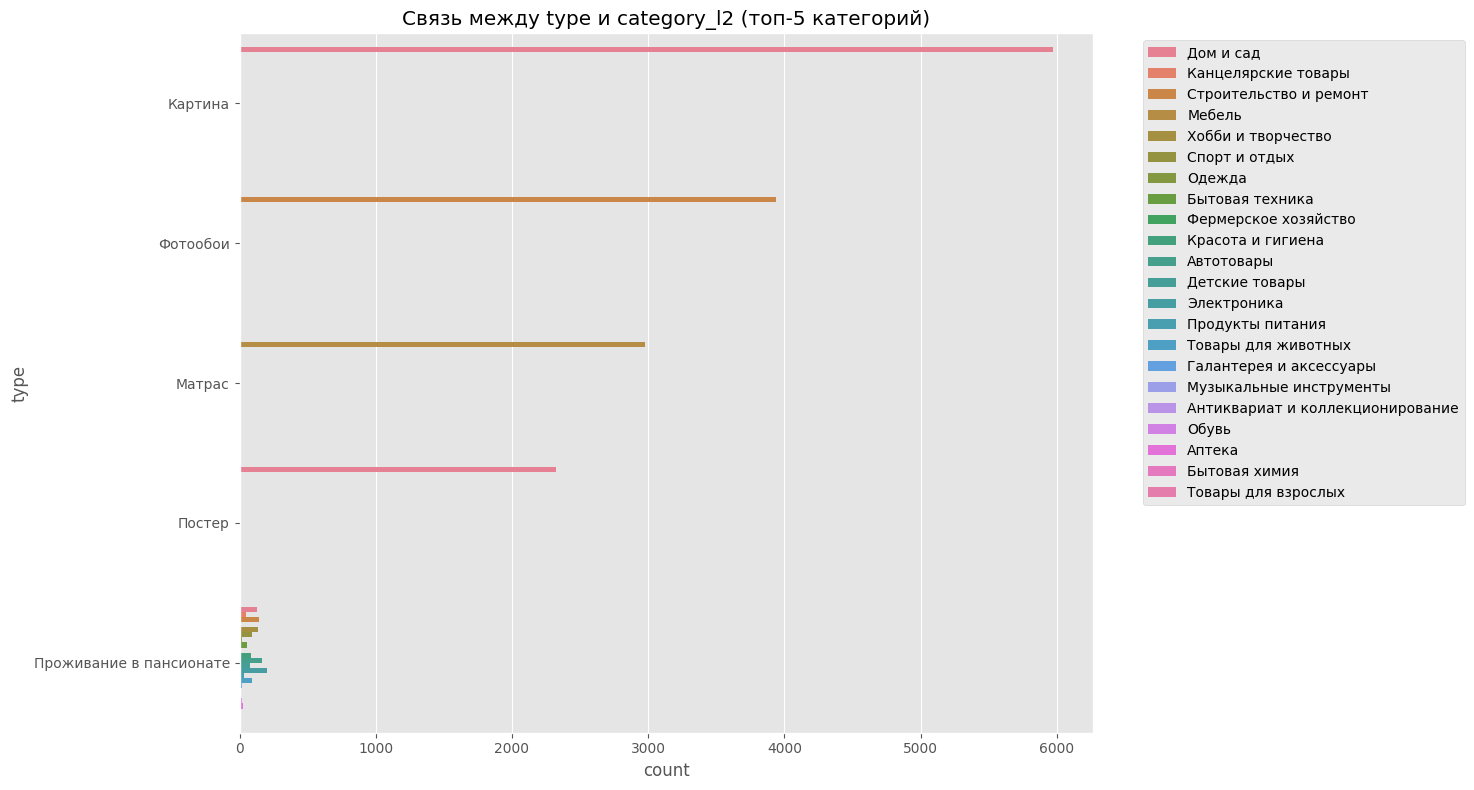

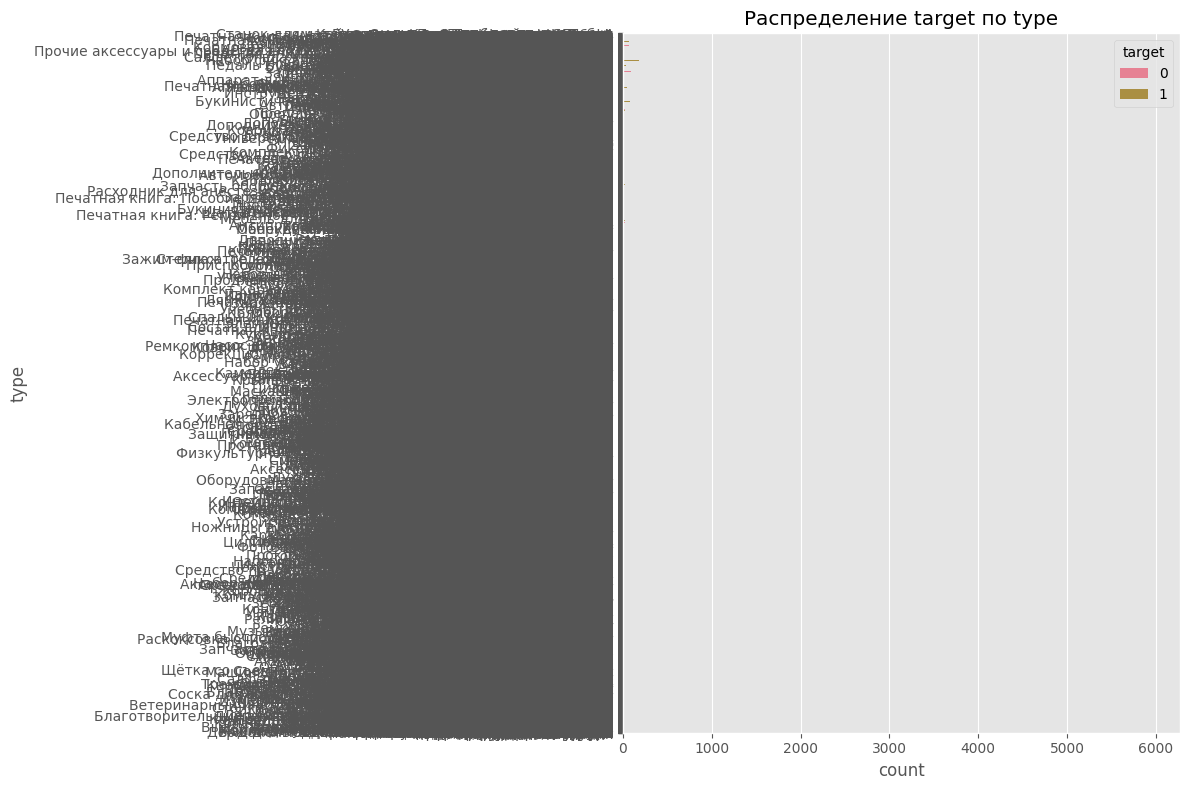

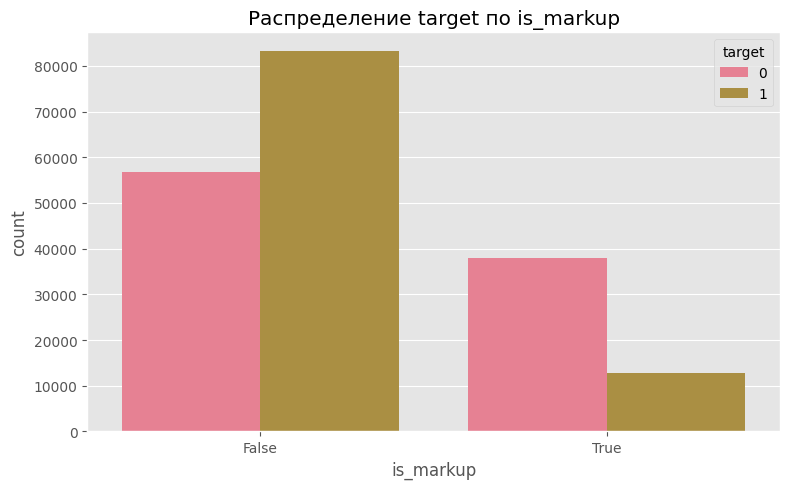

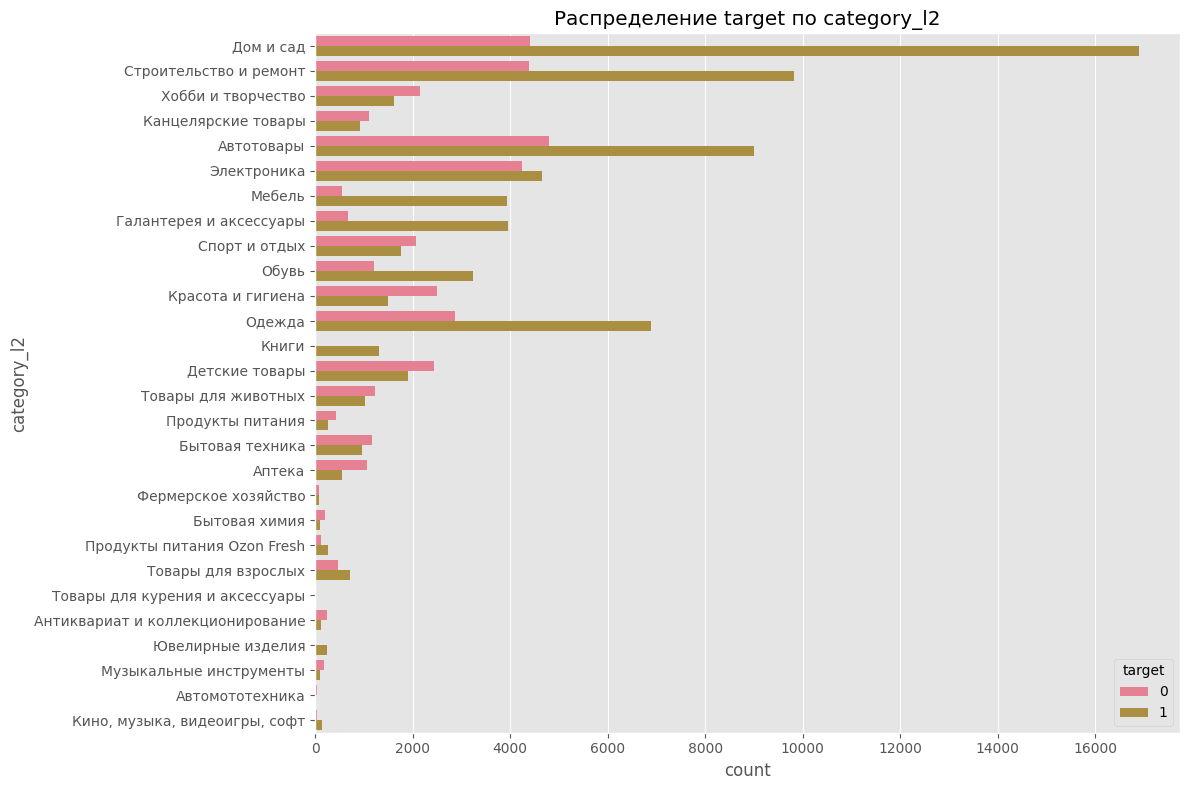

In [33]:
# Этап 6: Анализ взаимосвязей
print("\n" + "="*50)
print("ЭТАП 6: АНАЛИЗ ВЗАИМОСВЯЗЕЙ")
print("="*50)

# Связь между type и category_l2 (если есть)
if all(col in test_df.columns for col in ['type', 'category_l2']):
    # Для визуализации возьмем топ-5 категорий по type
    top_types = test_df['type'].value_counts().head(5).index

    # Фильтруем данные, оставляя только записи с заполненными category_l2
    filtered_df = test_df[test_df['type'].isin(top_types) & ~test_df['category_l2'].isna()]

    if not filtered_df.empty:
        plt.figure(figsize=(15, 8))
        sns.countplot(data=filtered_df,
                     y='type', hue='category_l2',
                     order=top_types)
        plt.title('Связь между type и category_l2 (топ-5 категорий)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("Нет данных для отображения связи между type и category_l2")

# Связь между target и другими переменными
if 'target' in test_df.columns:
    # С type
    if 'type' in test_df.columns:
        plt.figure(figsize=(12, 8))
        sns.countplot(data=test_df, y='type', hue='target')
        plt.title('Распределение target по type')
        plt.tight_layout()
        plt.show()

    # С is_markup
    if 'is_markup' in test_df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=test_df, x='is_markup', hue='target')
        plt.title('Распределение target по is_markup')
        plt.tight_layout()
        plt.show()

    # Дополнительно: связь между target и category_l2 (если есть)
    if 'category_l2' in test_df.columns and not test_df['category_l2'].isna().all():
        plt.figure(figsize=(12, 8))
        sns.countplot(data=test_df[~test_df['category_l2'].isna()],
                     y='category_l2', hue='target')
        plt.title('Распределение target по category_l2')
        plt.tight_layout()
        plt.show()
else:
    print("Столбец 'target' отсутствует в данных, анализ взаимосвязей невозможен")

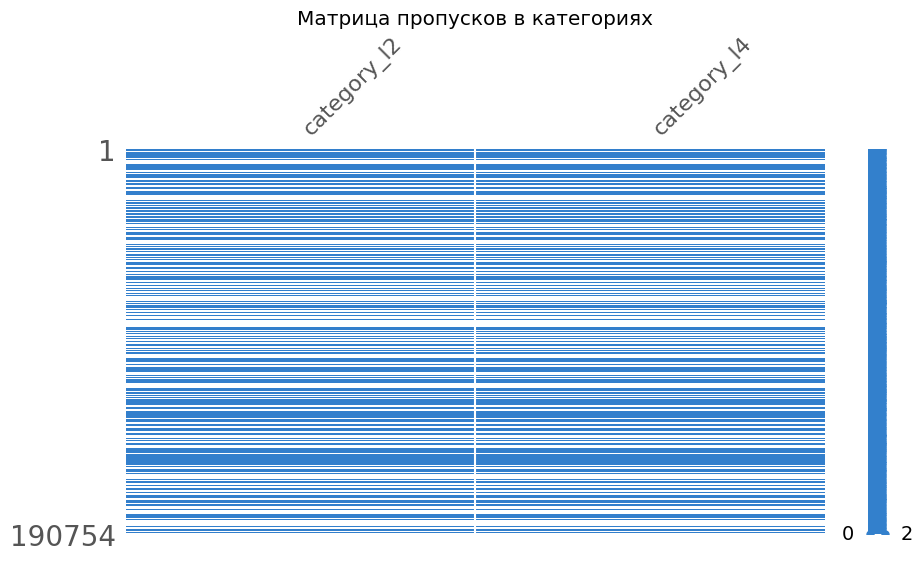

In [25]:
# Матрица пропусков для category_l2 и category_l4 (если они есть)
import missingno as msno
cols_to_check = ['category_l2', 'category_l4']  # Добавьте другие столбцы при необходимости
existing_cols = [col for col in cols_to_check if col in test_df.columns]

if existing_cols:
    msno.matrix(test_df[existing_cols], figsize=(10, 5), color=(0.2, 0.5, 0.8))
    plt.title('Матрица пропусков в категориях')
    plt.show()
else:
    print(f"Столбцы {cols_to_check} отсутствуют в данных.")



ЭТАП 3: АНАЛИЗ ТЕКСТОВЫХ ДАННЫХ

Анализ текстовых данных (колонка 'name'):


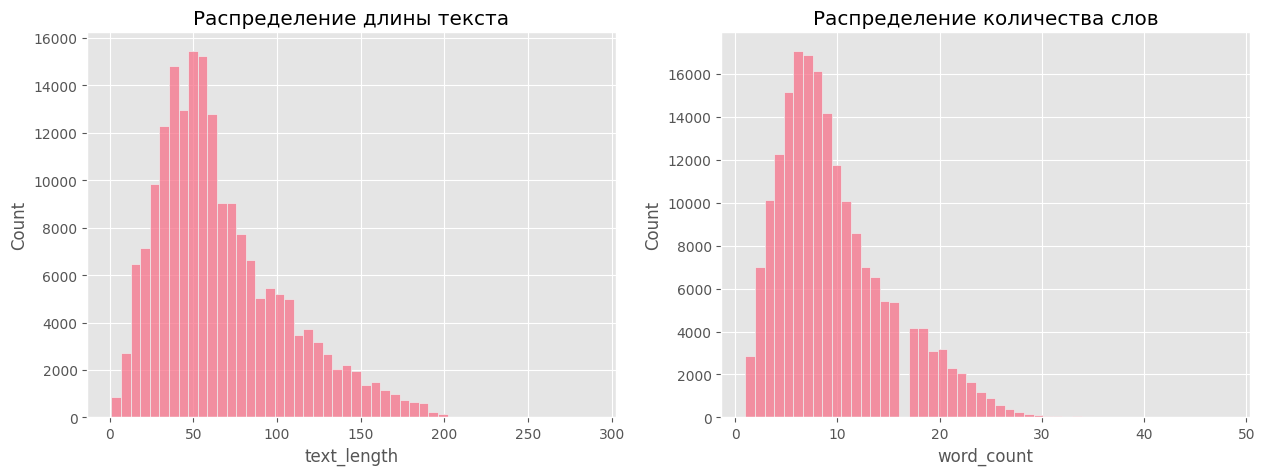


Примеры текстовых описаний:
- Стропа для шитья, лента ременная, 45.7 м
- Утеплитель стёганый для одежды - Сиберия Хаски "Ромб", (размер 300х150 см) плотность 180 г/м2
- Гитарная стойка Guitto GGS-02 Стойка для гитары, складная
- Колесо для транспортных тележек, d 150, на площадке покрытие PP
- Подходит для защитного чехла Garmin Venu3/3s-черный-45 мм


In [ ]:
# Этап 3: Анализ текстовых данных
print("\n" + "="*50)
print("ЭТАП 3: АНАЛИЗ ТЕКСТОВЫХ ДАННЫХ")
print("="*50)
train_df = analyze_text_data(test_df)


ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ


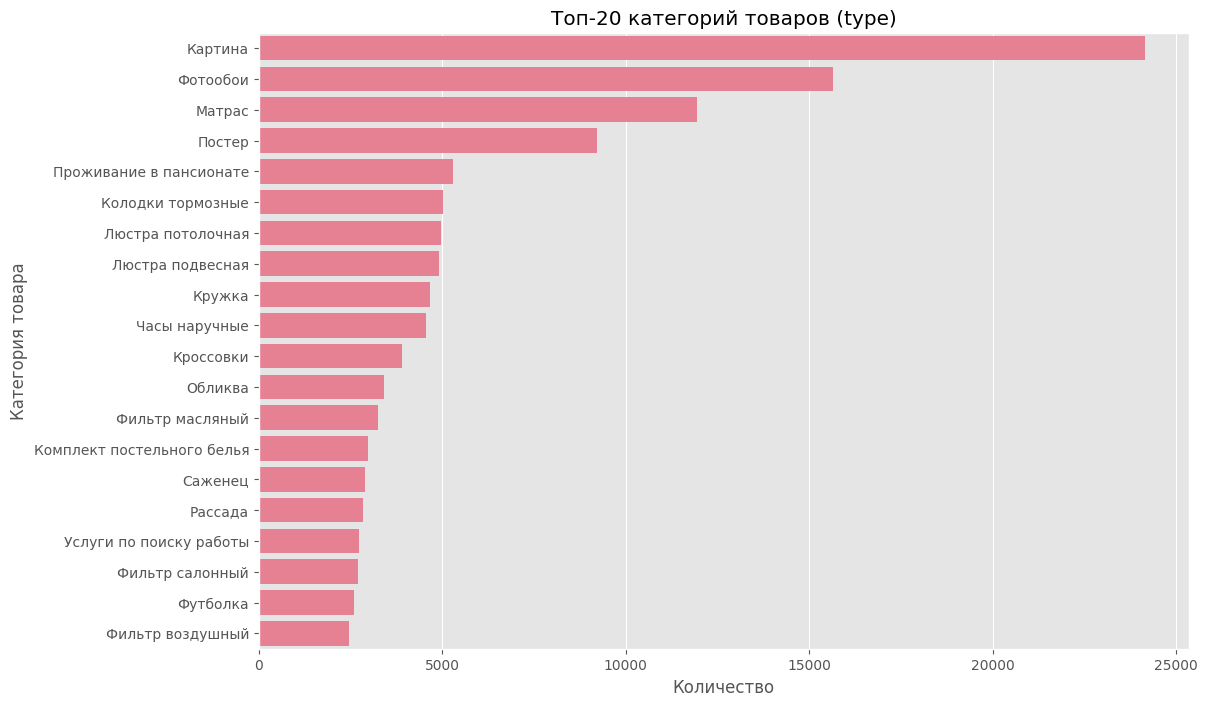

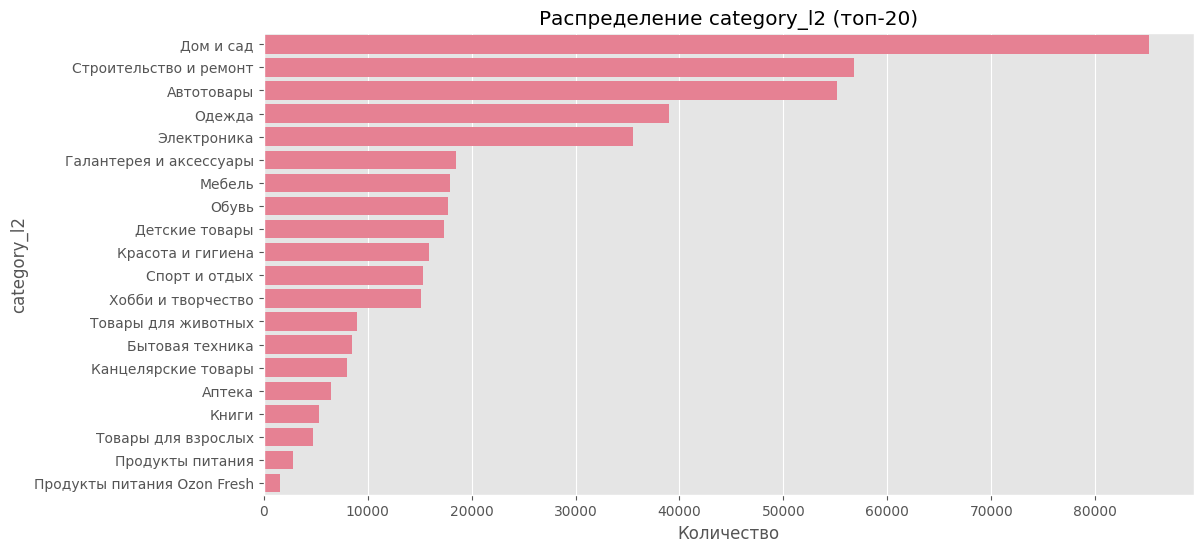

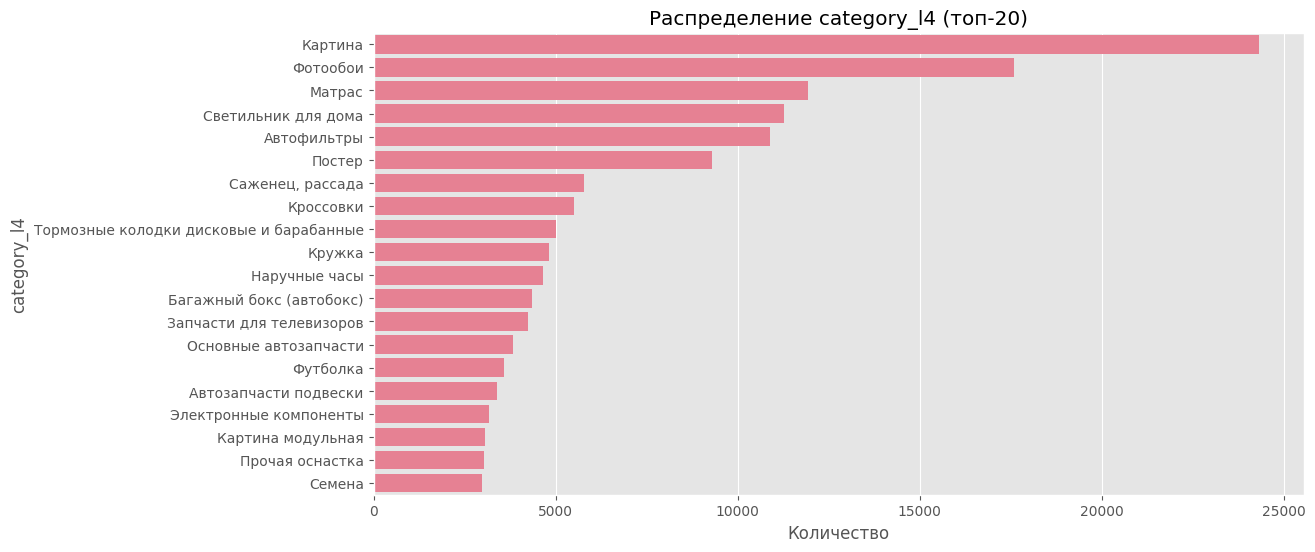

In [ ]:
# Этап 4: Анализ категориальных переменныхtrain_df
print("\n" + "="*50)
print("ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ")
print("="*50)

# Анализ целевой переменной type
plt.figure(figsize=(12, 8))
type_counts = train_df['type'].value_counts()

if len(type_counts) > 20:
    # Для большого количества категорий покажем топ-20
    type_counts = type_counts.head(20)
    plt.title('Топ-20 категорий товаров (type)')
else:
    plt.title('Распределение категорий товаров (type)')

sns.barplot(y=type_counts.index, x=type_counts.values)
plt.xlabel('Количество')
plt.ylabel('Категория товара')
plt.show()

# Анализ category_l2 и category_l4
for col in ['category_l2', 'category_l4']:
    if col in train_df.columns:
        plt.figure(figsize=(12, 6))
        counts = train_df[col].value_counts().head(20)
        sns.barplot(y=counts.index, x=counts.values)
        plt.title(f'Распределение {col} (топ-20)')
        plt.xlabel('Количество')
        plt.ylabel(col)
        plt.show()



ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ test_df


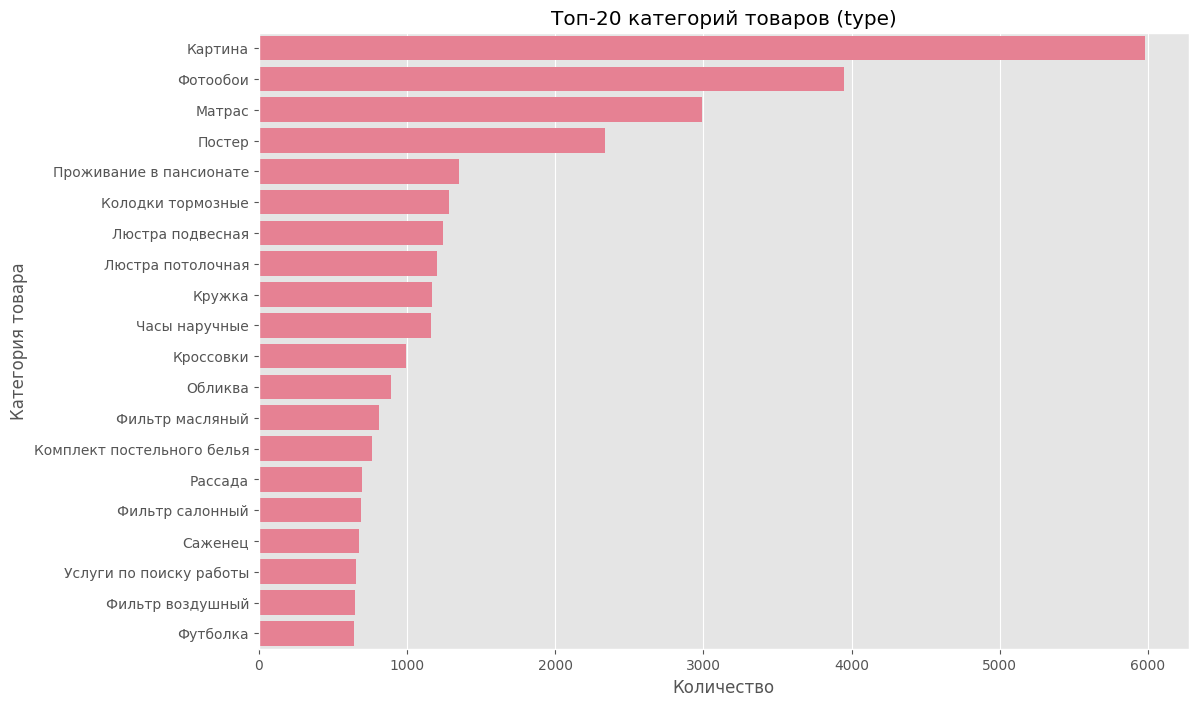

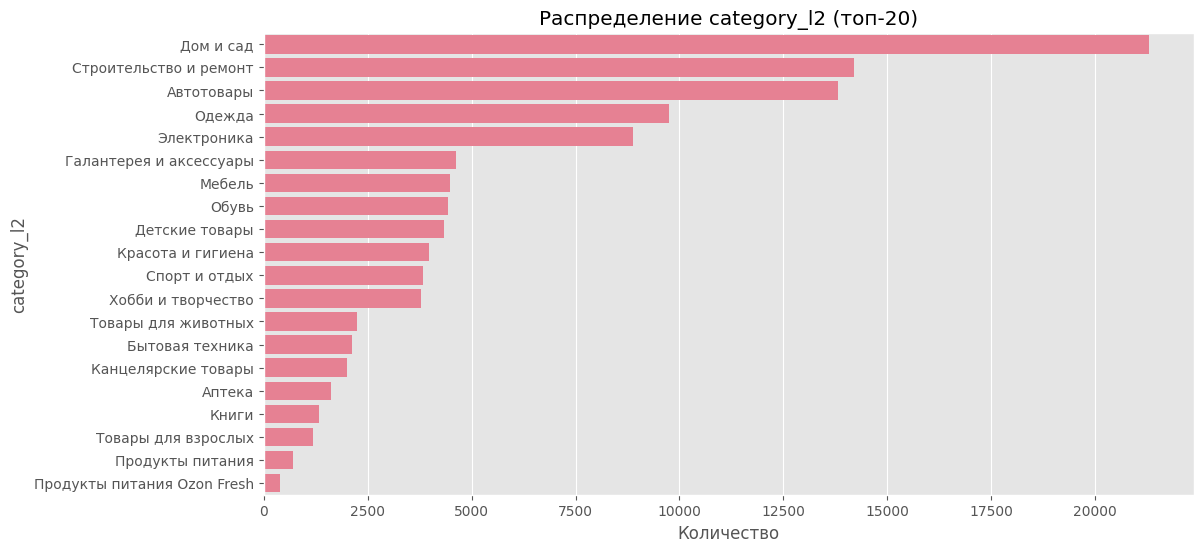

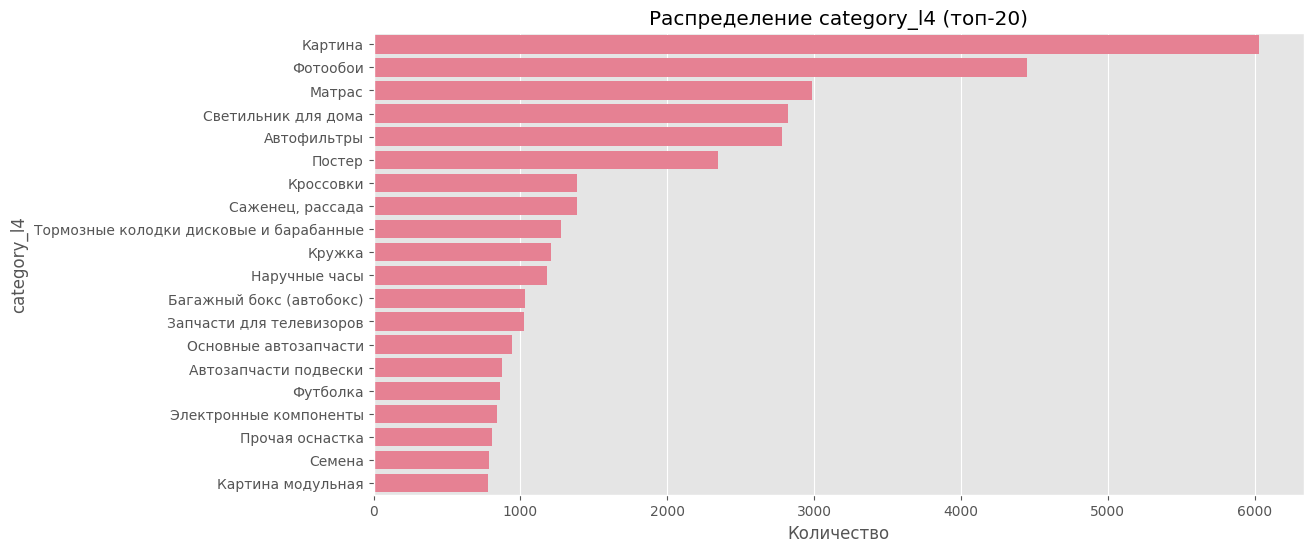

In [ ]:
# Этап 4: Анализ категориальных переменных test_df
print("\n" + "="*50)
print("ЭТАП 4: АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ test_df")
print("="*50)

# Анализ целевой переменной type
plt.figure(figsize=(12, 8))
type_counts = test_df['type'].value_counts()

if len(type_counts) > 20:
    # Для большого количества категорий покажем топ-20
    type_counts = type_counts.head(20)
    plt.title('Топ-20 категорий товаров (type)')
else:
    plt.title('Распределение категорий товаров (type)')

sns.barplot(y=type_counts.index, x=type_counts.values)
plt.xlabel('Количество')
plt.ylabel('Категория товара')
plt.show()

# Анализ category_l2 и category_l4
for col in ['category_l2', 'category_l4']:
    if col in test_df.columns:
        plt.figure(figsize=(12, 6))
        counts = test_df[col].value_counts().head(20)
        sns.barplot(y=counts.index, x=counts.values)
        plt.title(f'Распределение {col} (топ-20)')
        plt.xlabel('Количество')
        plt.ylabel(col)
        plt.show()


ЭТАП 5: АНАЛИЗ БИНАРНЫХ ПЕРЕМЕННЫХ


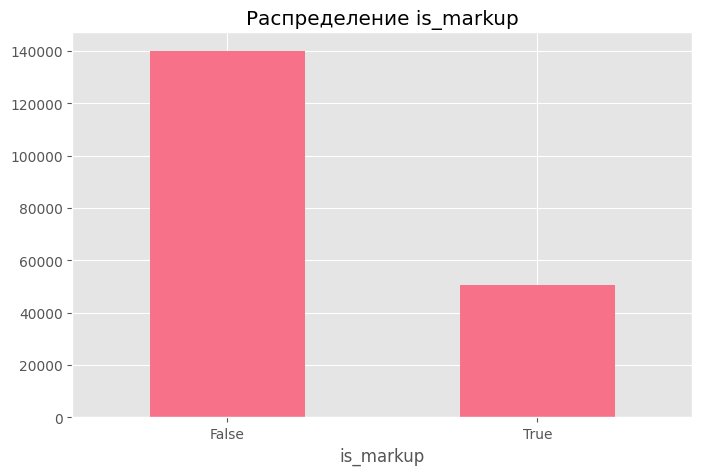

Процент
is_markup          
False      0.733919
True       0.266081

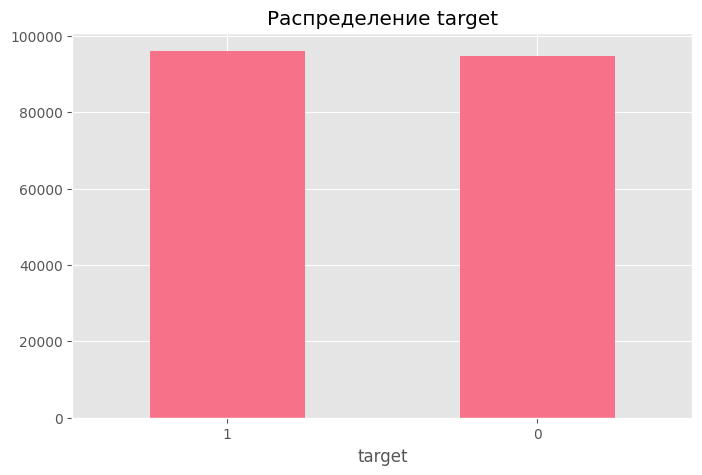

Процент
target          
1       0.503145
0       0.496855

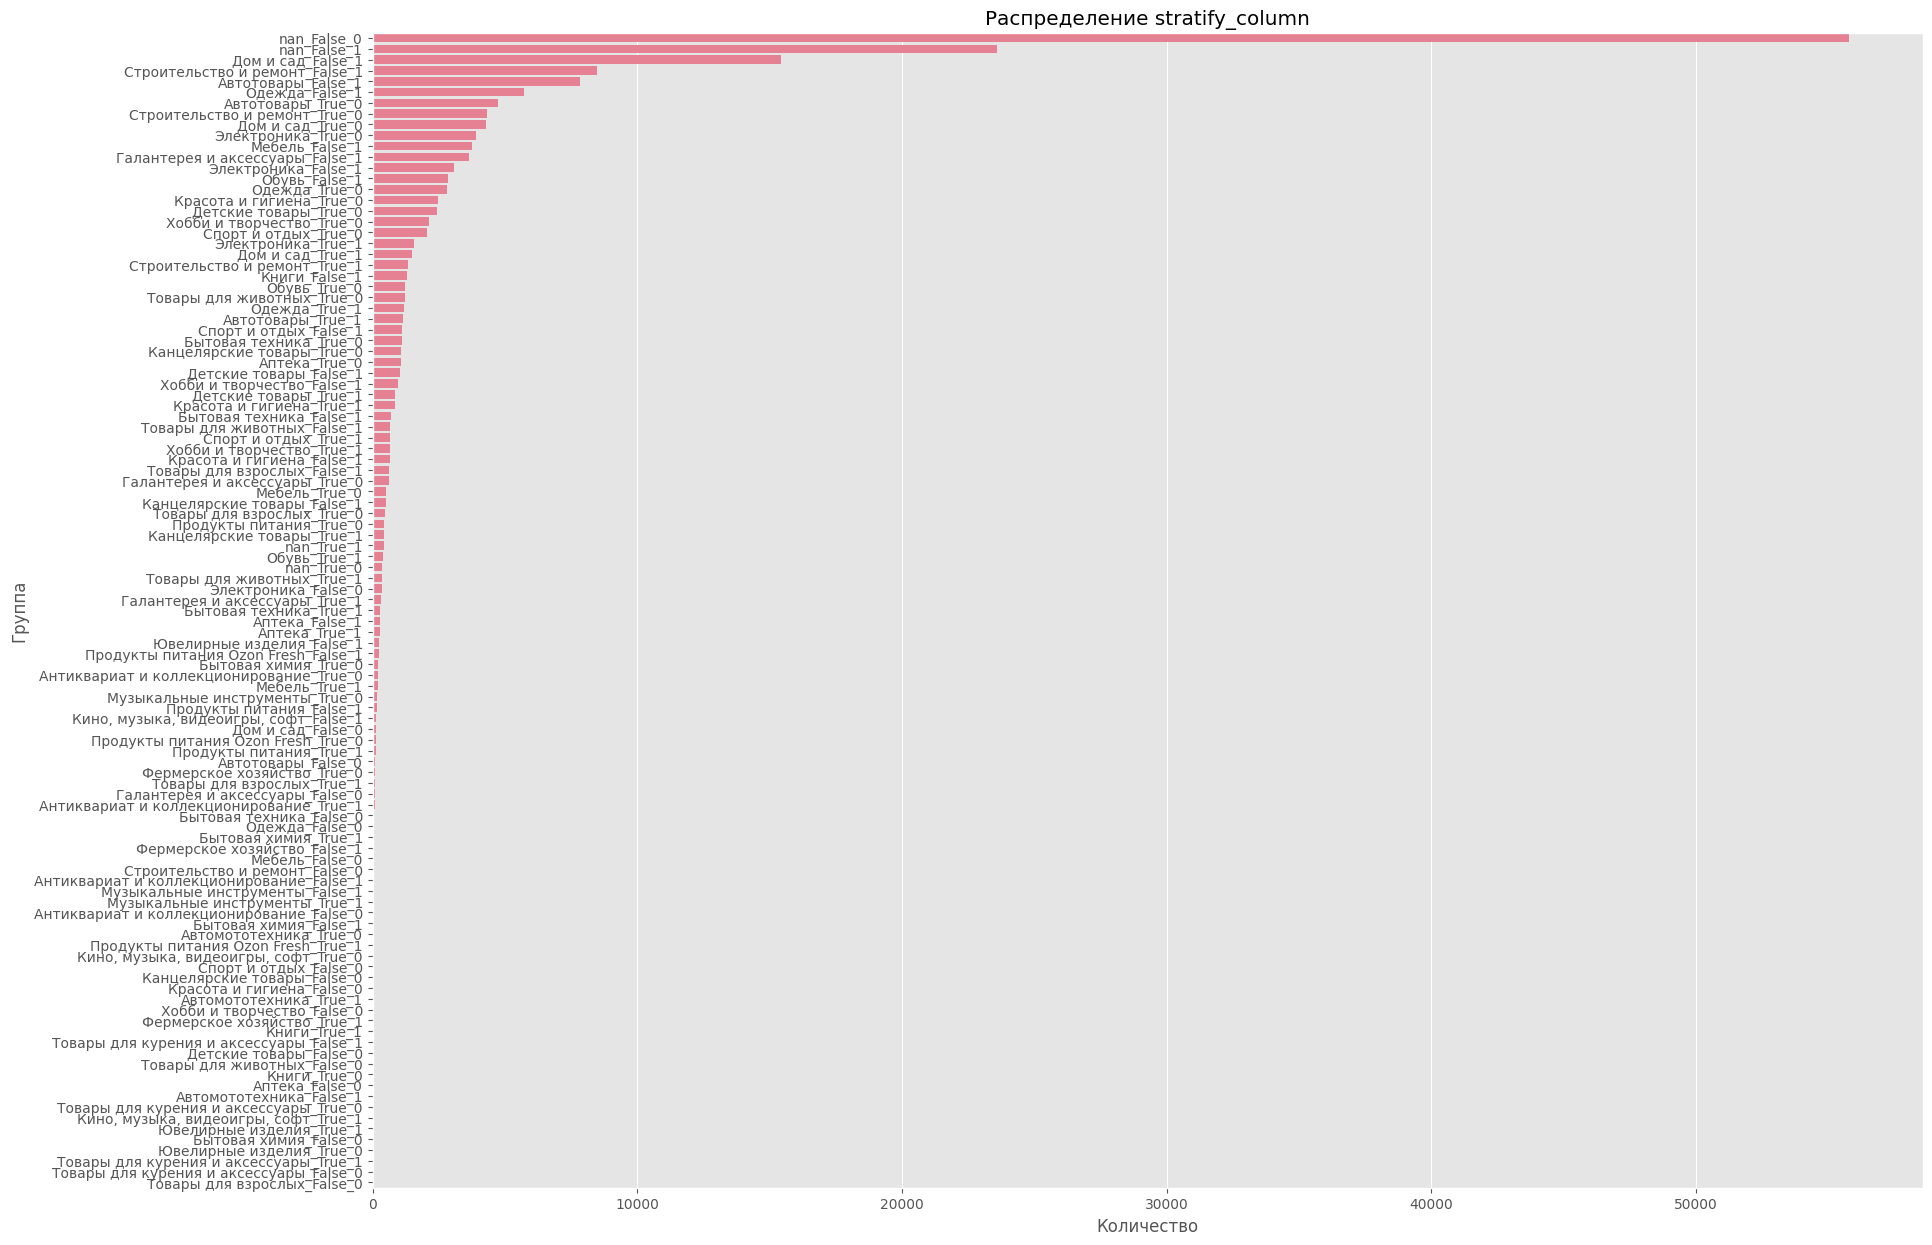


ЭТАП 6: АНАЛИЗ ВЗАИМОСВЯЗЕЙ


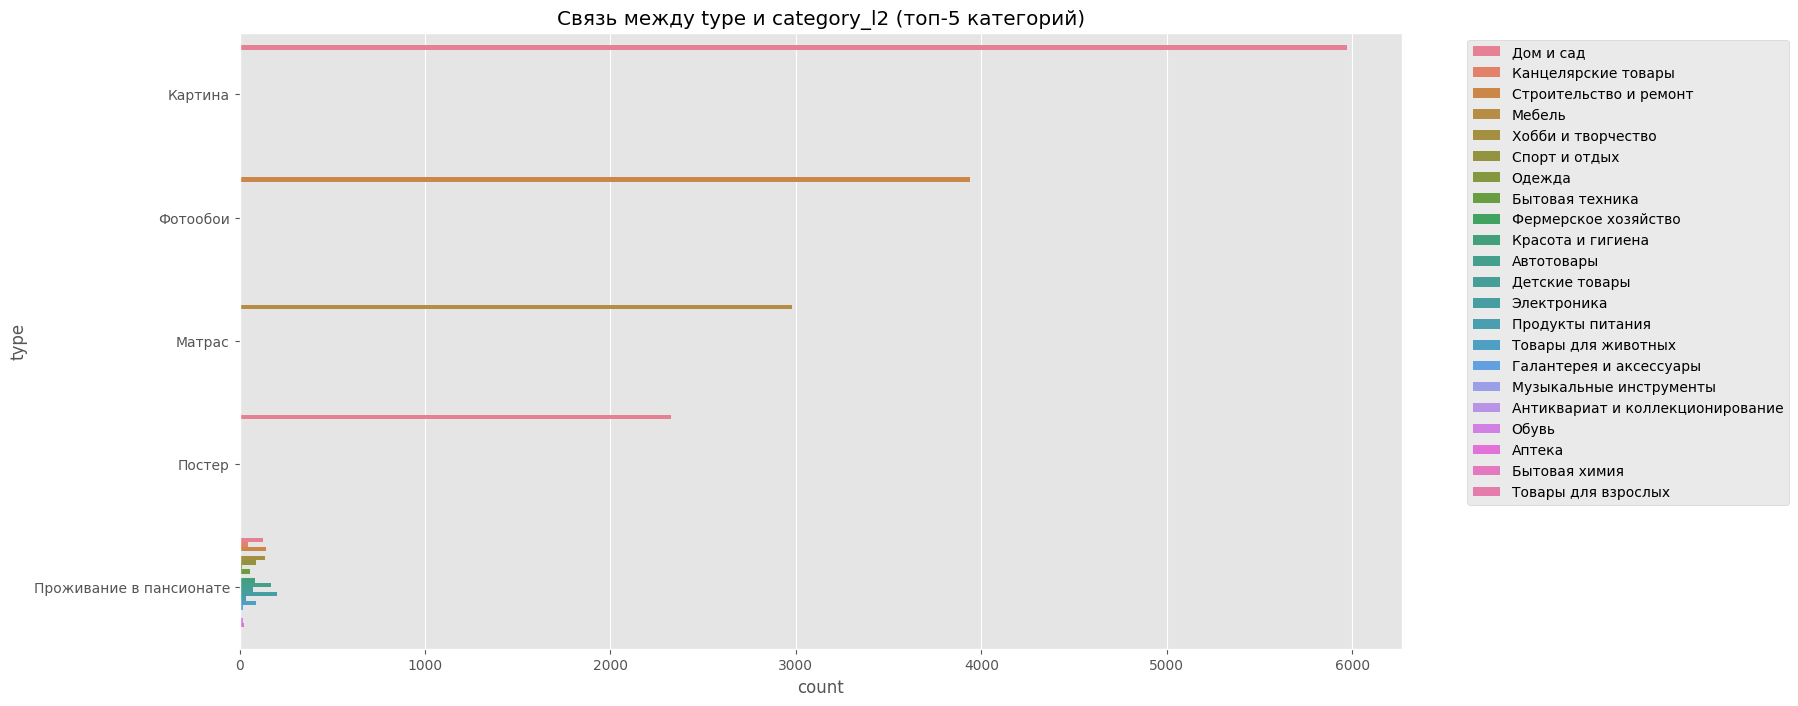

In [ ]:
# Этап 5: Анализ бинарных переменных
print("\n" + "="*50)
print("ЭТАП 5: АНАЛИЗ БИНАРНЫХ ПЕРЕМЕННЫХ")
print("="*50)

for col in ['is_markup', 'target']:
    if col in train_df.columns:
        plt.figure(figsize=(8, 5))
        train_df[col].value_counts().plot(kind='bar')
        plt.title(f'Распределение {col}')
        plt.xticks(rotation=0)
        plt.show()

        # Процентное соотношение
        display(train_df[col].value_counts(normalize=True).to_frame('Процент'))

# Анализ stratify_column
if 'stratify_column' in train_df.columns:
    plt.figure(figsize=(20, 15))
    stratify_counts = train_df['stratify_column'].value_counts()
    sns.barplot(y=stratify_counts.index, x=stratify_counts.values)
    plt.title('Распределение stratify_column')
    plt.xlabel('Количество')
    plt.ylabel('Группа')
    plt.show()

# Этап 6: Анализ взаимосвязей
print("\n" + "="*50)
print("ЭТАП 6: АНАЛИЗ ВЗАИМОСВЯЗЕЙ")
print("="*50)
# Связь между type и category_l2 (если есть)
if all(col in train_df.columns for col in ['type', 'category_l2']):
    # Для визуализации возьмем топ-5 категорий по type
    top_types = train_df['type'].value_counts().head(5).index

    plt.figure(figsize=(15, 8))
    sns.countplot(data=train_df[train_df['type'].isin(top_types)],
                 y='type', hue='category_l2',
                 order=top_types)
    plt.title('Связь между type и category_l2 (топ-5 категорий)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Связь между target и другими переменными
if 'target' in train_df.columns:
    # С type
    if 'type' in train_df.columns:
        plt.figure(figsize=(12, 8))
        sns.countplot(data=train_df, y='type', hue='target')
        plt.title('Распределение target по type')
        plt.show()

    # С is_markup
    if 'is_markup' in train_df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=train_df, x='is_markup', hue='target')
        plt.title('Распределение target по is_markup')
        plt.show()
# Сохранение результатов анализа
analysis_results = {
    'train_shape': train_df.shape,
    'test_shape': test_df.shape,
    'common_columns': list(common_cols),
    'image_analysis': {
        'sample_size': 5,
        'status': 'completed'
    },
    'text_analysis': {
        'avg_length': train_df['text_length'].mean(),
        'avg_word_count': train_df['word_count'].mean()
    },
    'target_distribution': train_df['type'].value_counts().to_dict(),
    'binary_vars': {
        'is_markup': train_df['is_markup'].value_counts().to_dict(),
        'target': train_df['target'].value_counts().to_dict()
    }
}

# Дополнительно: можно сохранить результаты в файл
import json
with open('eda_results.json', 'w') as f:
    json.dump(analysis_results, f, indent=4)

print("\nАнализ EDA завершен. Результаты сохранены в eda_results.json")

### Сравнение 2х наборов

══════════════════════════════════════════════════
СРАВНЕНИЕ ТРЕНИРОВОЧНОГО И ТЕСТОВОГО НАБОРОВ ДАННЫХ
══════════════════════════════════════════════════

1. Основные характеристики:


Характеристика  Тренировочный набор  Тестовый набор
0    Количество строк               763013          190754
1  Количество колонок                    8               8
2     Всего пропусков               641212          160302
3           Дубликаты                47730            5221


2. Сравнение колонок:


Только в train Только в test    Общие колонки
0                                   category_l2
1                                   category_l4
2                                     is_markup
3                                    main_photo
4                                          name
5                               stratify_column
6                                        target
7                                          type


3. Пропущенные значения:


Колонка  Пропуски (train)  Пропуски (test)  Разница
3      category_l2            320606            80151   240455
7      category_l4            320606            80151   240455
1       main_photo                 0                0        0
0  stratify_column                 0                0        0
2             name                 0                0        0
4        is_markup                 0                0        0
5           target                 0                0        0
6             type                 0                0        0

<Figure size 1200x600 with 0 Axes>

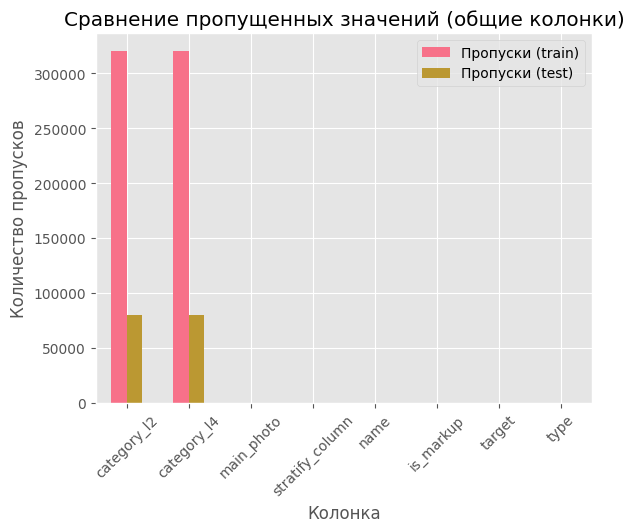


4. Сравнение категориальных переменных:

Колонка: main_photo
Уникальных значений (train/test): 501598/151879
Новые значения в тесте: 105322
Примеры: ['https://cdn1.ozone.ru/s3/multimedia-k/6714558236.jpg', 'https://cdn1.ozone.ru/multimedia/1007590432.jpg', 'https://cdn1.ozone.ru/s3/multimedia-p/6204409753.jpg']


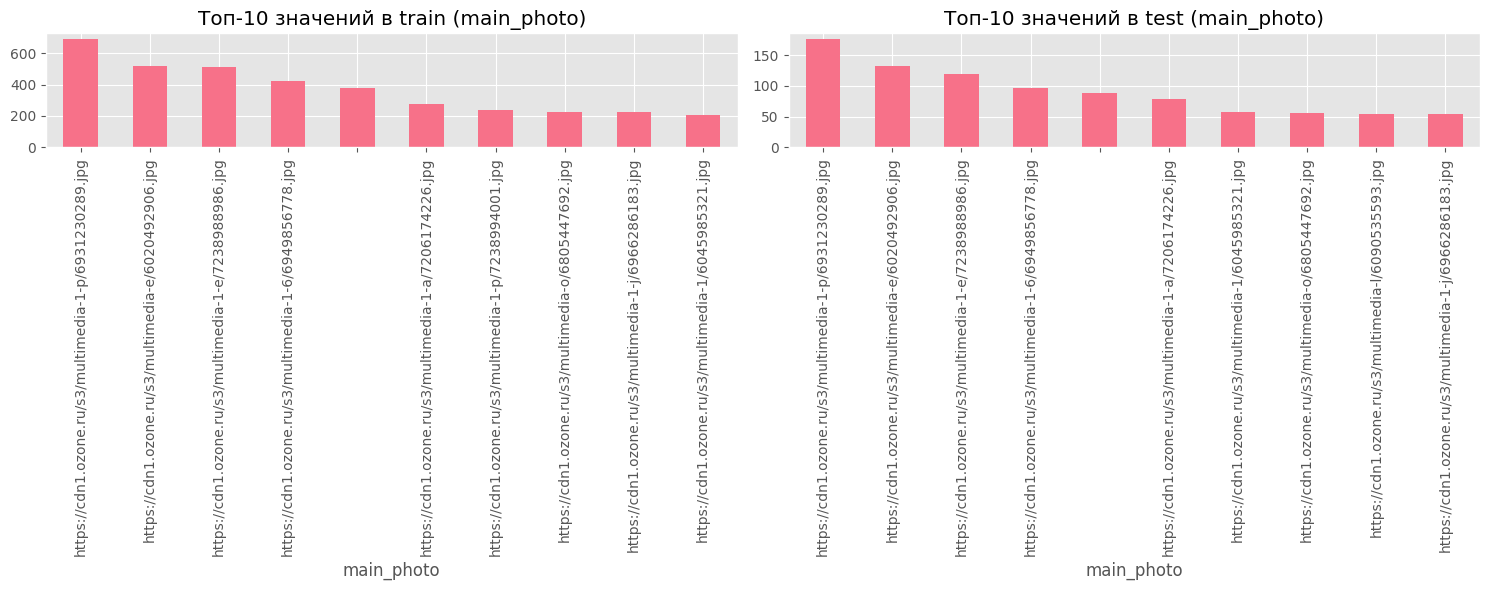


Колонка: name
Уникальных значений (train/test): 489529/150393
Новые значения в тесте: 101386
Примеры: ['Quiksilver Чехол для беговых лыж', 'Солнцезащитные очки polaroid pld-205125ydv65m9', '9IMOD 4,3-дюймовый 5,8G F.P.V монитор HD Авиационная беспроводн']


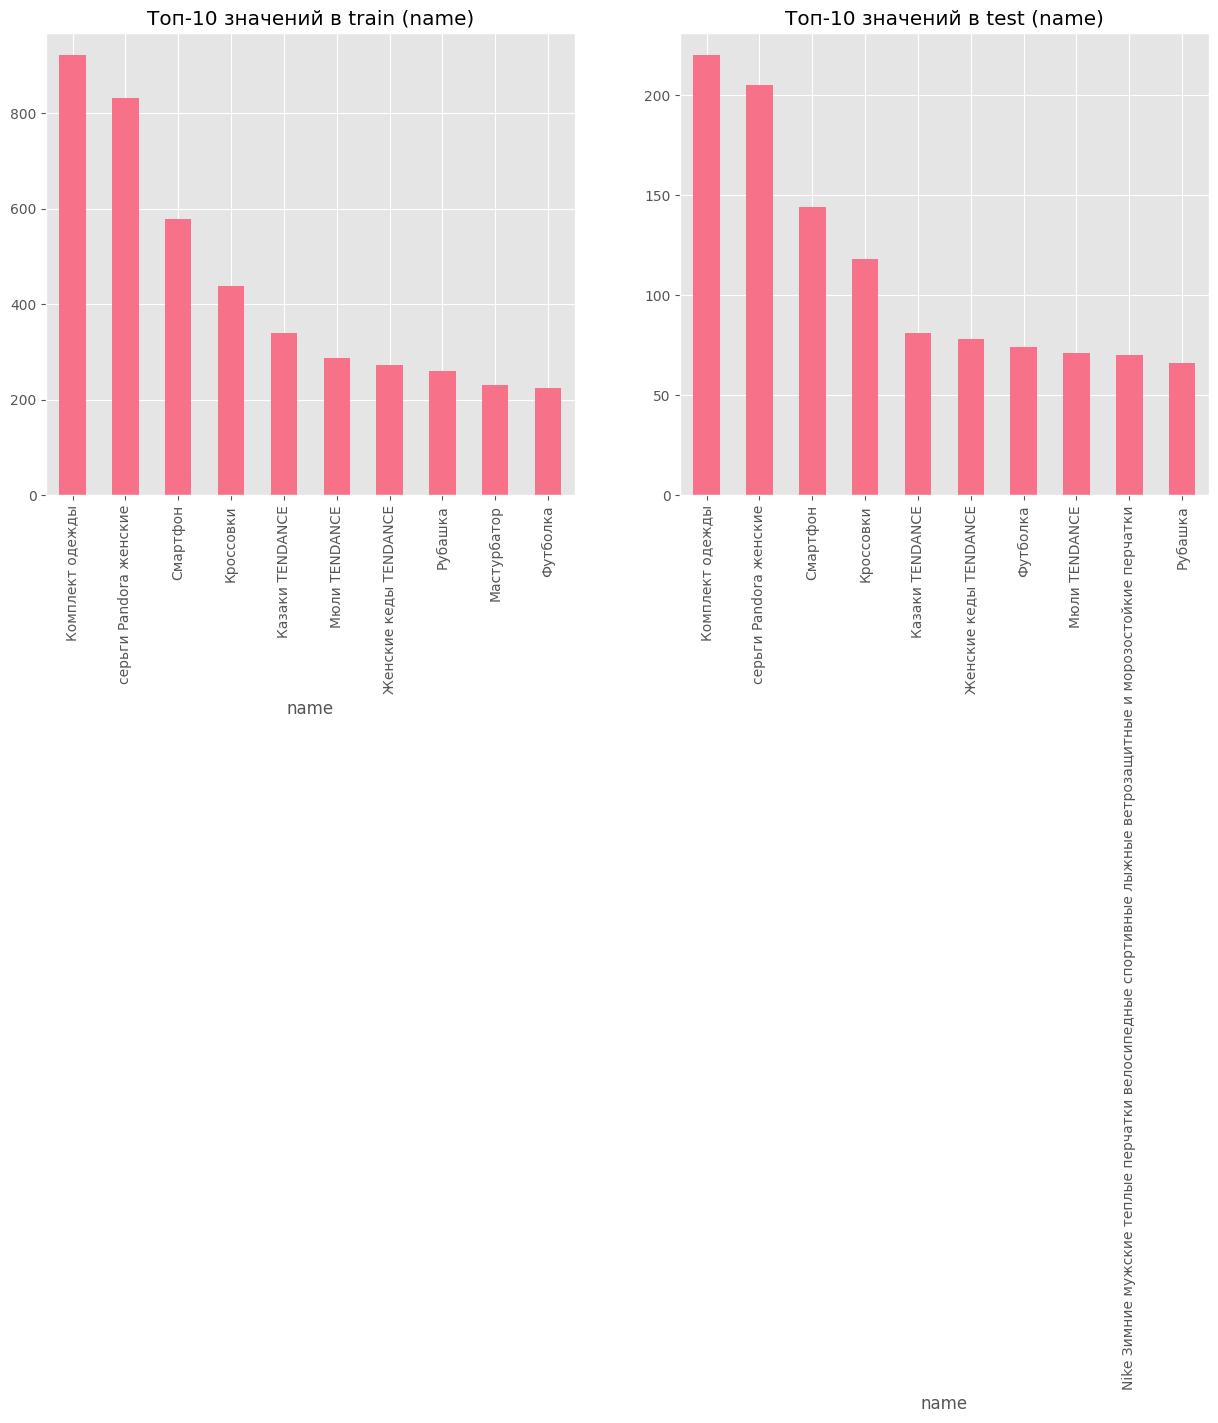


Колонка: stratify_column
Уникальных значений (train/test): 108/107


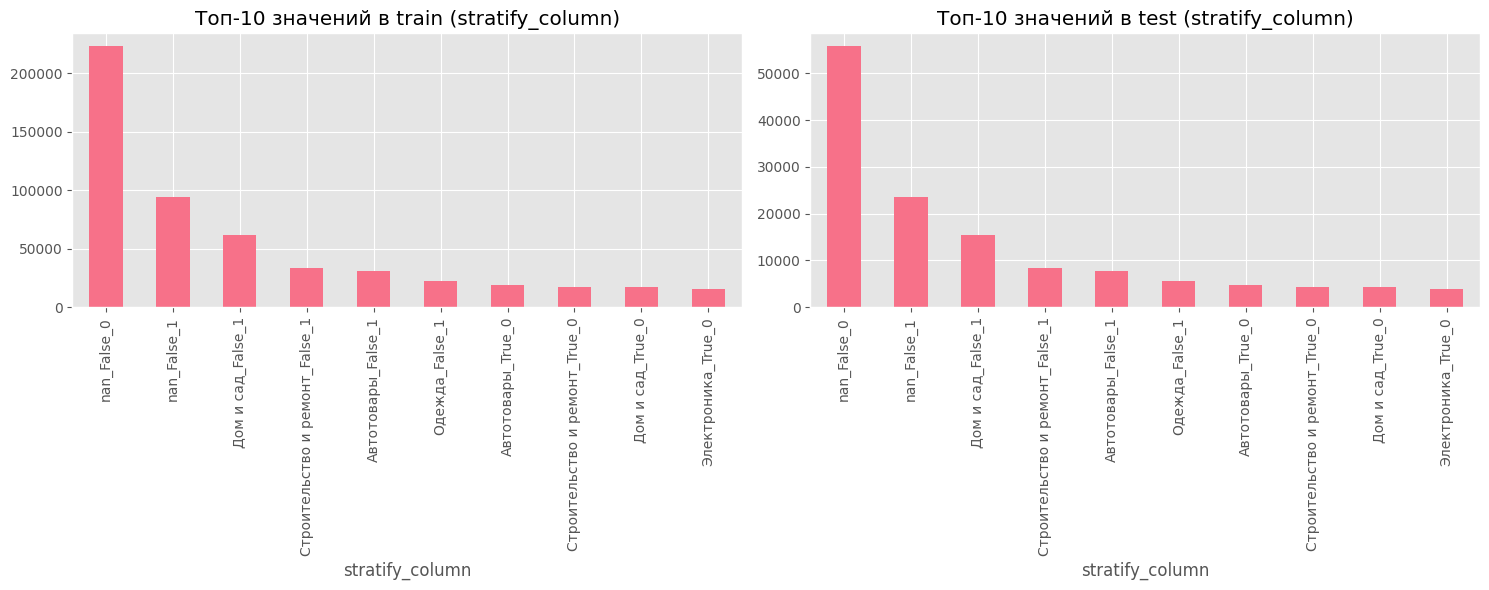


5. Сравнение числовых переменных:


Колонка  Среднее (train)  Среднее (test)  Разница средних  Медиана (train)  Медиана (test)
0  is_markup         0.266065        0.266081    -1.599155e-05              0.0             0.0
1     target         0.503145        0.503145    -6.429298e-07              1.0             1.0

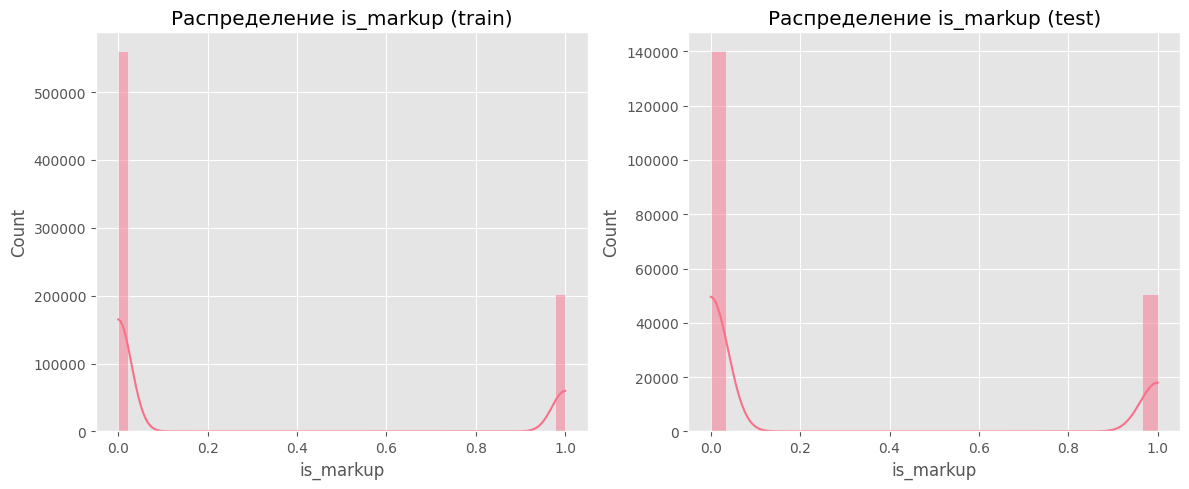

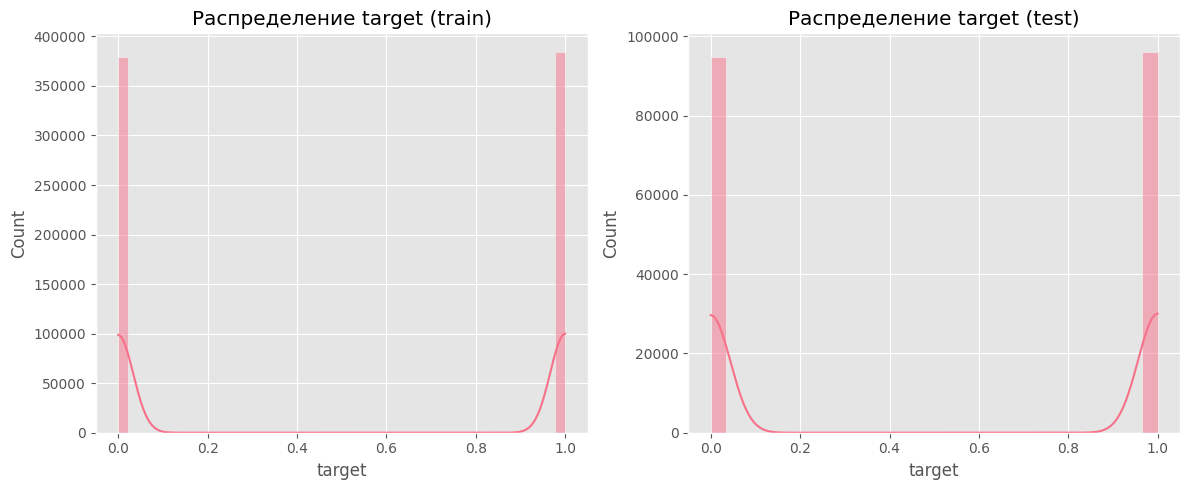


6. Сравнение бинарных переменных:

Колонка: is_markup


Значение  Доля (train)  Доля (test)   Разница
0     False      0.733935     0.733919  0.000016
1      True      0.266065     0.266081 -0.000016

<Figure size 800x400 with 0 Axes>

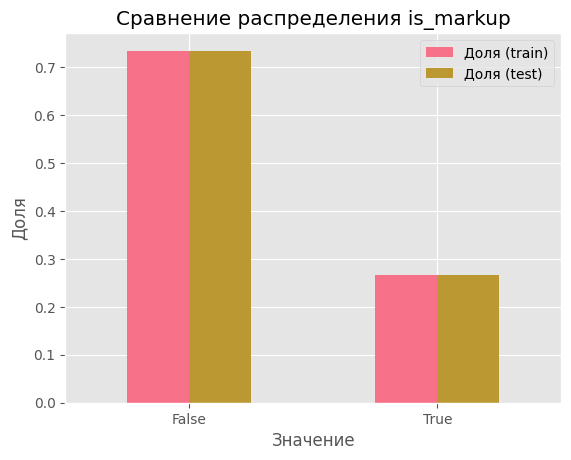


Колонка: target


Значение  Доля (train)  Доля (test)       Разница
0         0      0.496855     0.496855  6.429298e-07
1         1      0.503145     0.503145 -6.429298e-07

<Figure size 800x400 with 0 Axes>

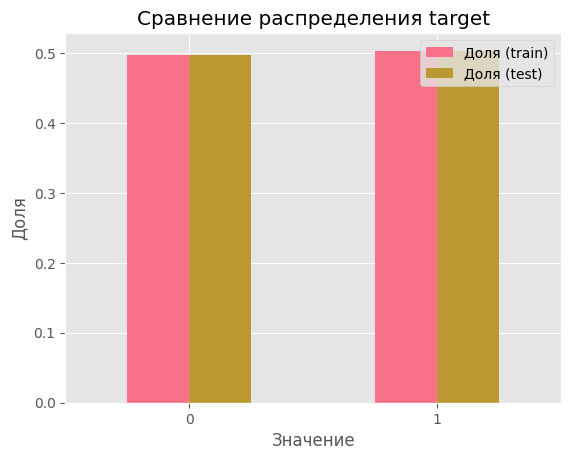

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')
sns.set_palette("husl")

def compare_datasets(train_df, test_df):
    """Сравнение тренировочного и тестового наборов данных"""

    print("═"*50)
    print("СРАВНЕНИЕ ТРЕНИРОВОЧНОГО И ТЕСТОВОГО НАБОРОВ ДАННЫХ")
    print("═"*50)

    # 1. Сравнение основных характеристик
    print("\n1. Основные характеристики:")
    comparison = pd.DataFrame({
        'Характеристика': ['Количество строк', 'Количество колонок', 'Всего пропусков', 'Дубликаты'],
        'Тренировочный набор': [train_df.shape[0], train_df.shape[1],
                              train_df.isnull().sum().sum(), train_df.duplicated().sum()],
        'Тестовый набор': [test_df.shape[0], test_df.shape[1],
                         test_df.isnull().sum().sum(), test_df.duplicated().sum()]
    })
    display(comparison[['Характеристика', 'Тренировочный набор', 'Тестовый набор']])

    # 2. Сравнение колонок
    print("\n2. Сравнение колонок:")
    common_cols = sorted(list(set(train_df.columns) & set(test_df.columns)))
    unique_train = sorted(list(set(train_df.columns) - set(test_df.columns)))
    unique_test = sorted(list(set(test_df.columns) - set(train_df.columns)))

    max_len = max(len(unique_train), len(unique_test), len(common_cols))
    comparison_data = {
        'Только в train': unique_train + [''] * (max_len - len(unique_train)),
        'Только в test': unique_test + [''] * (max_len - len(unique_test)),
        'Общие колонки': common_cols + [''] * (max_len - len(common_cols))
    }

    cols_comparison = pd.DataFrame(comparison_data)
    display(cols_comparison)

    # 3. Сравнение пропущенных значений
    print("\n3. Пропущенные значения:")
    missing_data = []
    all_columns = set(train_df.columns).union(set(test_df.columns))

    for col in all_columns:
        train_missing = train_df[col].isnull().sum() if col in train_df.columns else np.nan
        test_missing = test_df[col].isnull().sum() if col in test_df.columns else np.nan

        if train_missing > 0 or test_missing > 0 or pd.notna(train_missing) and pd.notna(test_missing):
            missing_data.append({
                'Колонка': col,
                'Пропуски (train)': train_missing,
                'Пропуски (test)': test_missing,
                'Разница': train_missing - test_missing if pd.notna(train_missing) and pd.notna(test_missing) else np.nan
            })

    if missing_data:
        missing_comparison = pd.DataFrame(missing_data).sort_values('Пропуски (train)', ascending=False)
        display(missing_comparison)

        # Визуализация только для общих колонок
        common_missing = missing_comparison[missing_comparison['Колонка'].isin(common_cols)]
        if not common_missing.empty:
            plt.figure(figsize=(12, 6))
            common_missing.set_index('Колонка')[['Пропуски (train)', 'Пропуски (test)']].plot(kind='bar')
            plt.title('Сравнение пропущенных значений (общие колонки)')
            plt.ylabel('Количество пропусков')
            plt.xticks(rotation=45)
            plt.show()
    else:
        print("Пропущенных значений нет в обоих наборах.")

    # 4. Сравнение категориальных переменных
    print("\n4. Сравнение категориальных переменных:")
    cat_cols = [col for col in common_cols if pd.api.types.is_string_dtype(train_df[col]) or
               pd.api.types.is_categorical_dtype(train_df[col])]

    for col in cat_cols[:3]:  # Ограничимся первыми 3 для наглядности
        print(f"\nКолонка: {col}")

        # Уникальные значения
        train_unique = train_df[col].nunique()
        test_unique = test_df[col].nunique()

        print(f"Уникальных значений (train/test): {train_unique}/{test_unique}")

        # Новые значения в тестовом наборе
        if pd.api.types.is_categorical_dtype(train_df[col]):
            train_values = set(train_df[col].cat.categories)
            test_values = set(test_df[col].cat.categories)
        else:
            train_values = set(train_df[col].dropna().unique())
            test_values = set(test_df[col].dropna().unique())

        new_in_test = test_values - train_values

        if new_in_test:
            print(f"Новые значения в тесте: {len(new_in_test)}")
            print(f"Примеры: {list(new_in_test)[:3]}")

        # Визуализация распределения
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        train_df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f'Топ-10 значений в train ({col})')

        plt.subplot(1, 2, 2)
        test_df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f'Топ-10 значений в test ({col})')

        plt.tight_layout()
        plt.show()

    # 5. Сравнение числовых переменных
    print("\n5. Сравнение числовых переменных:")
    num_cols = [col for col in common_cols if pd.api.types.is_numeric_dtype(train_df[col])]

    if num_cols:
        # Сравнение статистик
        stats = []
        for col in num_cols:
            stats.append({
                'Колонка': col,
                'Среднее (train)': train_df[col].mean(),
                'Среднее (test)': test_df[col].mean(),
                'Разница средних': train_df[col].mean() - test_df[col].mean(),
                'Медиана (train)': train_df[col].median(),
                'Медиана (test)': test_df[col].median()
            })

        stats_df = pd.DataFrame(stats)
        display(stats_df)

        # Визуализация распределений
        for col in num_cols[:3]:  # Первые 3 колонки
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.histplot(train_df[col], kde=True)
            plt.title(f'Распределение {col} (train)')

            plt.subplot(1, 2, 2)
            sns.histplot(test_df[col], kde=True)
            plt.title(f'Распределение {col} (test)')

            plt.tight_layout()
            plt.show()
    else:
        print("Нет числовых колонок для сравнения.")

    # 6. Сравнение бинарных переменных
    print("\n6. Сравнение бинарных переменных:")
    binary_cols = [col for col in common_cols if train_df[col].nunique() == 2 and
                 pd.api.types.is_numeric_dtype(train_df[col])]

    for col in binary_cols:
        print(f"\nКолонка: {col}")

        # Распределение
        train_dist = train_df[col].value_counts(normalize=True).sort_index()
        test_dist = test_df[col].value_counts(normalize=True).sort_index()

        dist_comparison = pd.DataFrame({
            'Значение': train_dist.index,
            'Доля (train)': train_dist.values,
            'Доля (test)': test_dist.values,
            'Разница': train_dist.values - test_dist.values
        })
        display(dist_comparison)

        # Визуализация
        plt.figure(figsize=(8, 4))
        dist_comparison.set_index('Значение')[['Доля (train)', 'Доля (test)']].plot(kind='bar')
        plt.title(f'Сравнение распределения {col}')
        plt.ylabel('Доля')
        plt.xticks(rotation=0)
        plt.show()

# Загрузка данных
# Загрузка данных
train_df = pd.read_parquet('/content/sample_data/hackaton_train_types_recom.parquet')
test_df = pd.read_parquet('/content/sample_data/hackaton_test_types_recom.parquet')
# Выполнение сравнения
compare_datasets(train_df, test_df)

# Пропуски и дубликаты

In [2]:
train_df.shape

(763013, 8)

In [16]:
cols_null_percent = train_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

category_l2    42.018419
category_l4    42.018419
dtype: float64

In [ ]:
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    train_df[col + '_was_null'] = train_df[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'category_l4': 'unknown',
    'category_l2': 'unknown',
}
#заполняем пропуски в соответствии с заявленным словарем
train_df = train_df.fillna(values)
#выводим результирующую долю пропусков
train_df.isnull().mean()

main_photo              0.0
name                    0.0
type                    0.0
category_l2             0.0
category_l4             0.0
is_markup               0.0
target                  0.0
stratify_column         0.0
category_l2_was_null    0.0
category_l4_was_null    0.0
dtype: float64

In [19]:
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    test_df[col + '_was_null'] = test_df[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'category_l4': 'unknown',
    'category_l2': 'unknown',
}
#заполняем пропуски в соответствии с заявленным словарем
test_df = test_df.fillna(values)
#выводим результирующую долю пропусков
test_df.isnull().mean()

main_photo              0.0
name                    0.0
type                    0.0
category_l2             0.0
category_l4             0.0
is_markup               0.0
target                  0.0
stratify_column         0.0
category_l2_was_null    0.0
category_l4_was_null    0.0
dtype: float64

In [155]:
cols_null_percent = test_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

category_l2    42.017992
category_l4    42.017992
dtype: float64

In [156]:
train_df = train_df.dropna()

train_df.shape[0]

442407

In [157]:
test_df = test_df.dropna()

test_df.shape[0]

110603

In [20]:
train_df = train_df.drop_duplicates(subset=train_df.columns)
print(f'Результирующее число записей: {train_df.shape[0]}')

Результирующее число записей: 715283


In [21]:
test_df = test_df.drop_duplicates(subset=test_df.columns)
print(f'Результирующее число записей: {test_df.shape[0]}')

Результирующее число записей: 185533


In [7]:
train_df['target'].value_counts()

target
0    377910
1    337373
Name: count, dtype: int64

In [8]:
test_df['target'].value_counts()

target
0    94605
1    90928
Name: count, dtype: int64

# Матрица пересечений

In [ ]:
types = train_df['type'].value_counts().head(35).index.to_numpy()

In [101]:
train_df['name'] = train_df['name'].str.lower()

intersection_matrix = pd.DataFrame(index=types, columns=types, data=0)

for type_row in types:
    for type_col in types:
        count = train_df[
            (train_df['type'] == type_row) & 
            (train_df['name'].str.contains(type_col.lower()))
        ].shape[0]
        
        intersection_matrix.loc[type_row, type_col] = count

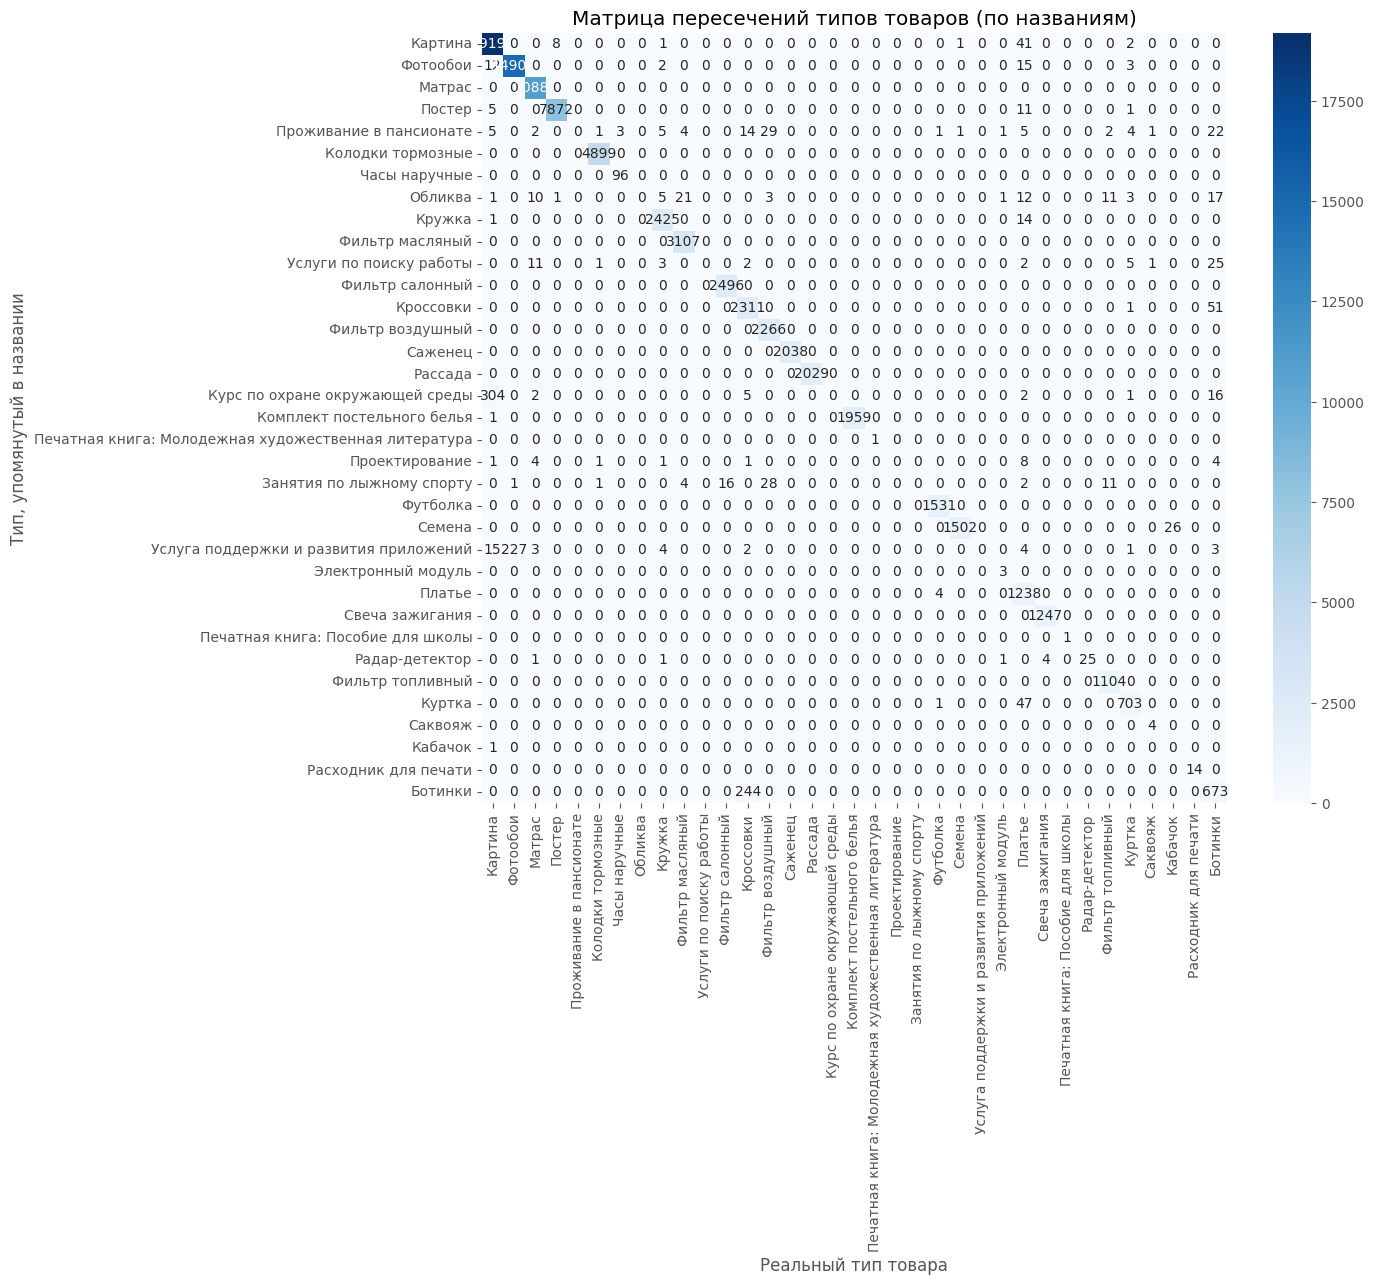

In [102]:
plt.figure(figsize=(12, 10))
sns.heatmap(intersection_matrix.astype(int), annot=True, fmt="d", cmap='Blues')
plt.title("Матрица пересечений типов товаров (по названиям)")
plt.ylabel("Тип, упомянутый в названии")
plt.xlabel("Реальный тип товара")
plt.show()

In [105]:
pd.set_option('display.max_colwidth', None)

train_df[
            (train_df['type'] == 'Проживание в пансионате') & 
            (train_df['name'].str.contains('Фильтр воздушный'.lower()))
        ][['name', 'type', 'category_l2', 'category_l4']]

name                     type category_l2  category_l4
256237                                                                                                            фильтр воздушный br.af.1.6 96950990 aveo, cobalt br.af.1.6 brave br.af.1.6  Проживание в пансионате  Автотовары  Автофильтры
415638                                                                             фильтр воздушный для мерседес w203 2000-2008, mercedes w203 фильтр воздушный fram ca9544, oem a1110940204  Проживание в пансионате  Автотовары  Автофильтры
63046                                                                                                                                                         фильтр воздушный sakura a30250  Проживание в пансионате  Автотовары  Автофильтры
832483                                                                      фильтр воздушный для тойота клюгер 2000-2003, toyota kluger фильтр воздушный stellox 71-01477-sx, oem 1780120050  Проживание в пансионате  Автотовары  Автофильтры
465851                                                                      фильтр воздушный livcar lct19932003a оем 17801-20040 toyota (rhd,lhd) термопластичная резина livcar lct19932003a  Проживание в пансионате  Автотовары  Автофильтры
560754                                                                         фильтр воздушный для тойота c-hr 2016-2021, toyota c-hr фильтр воздушный mann-filter c 17 008, oem 178010m040  Проживание в пансионате  Автотовары  Автофильтры
116474                                                     фильтр воздушный для ауди а1 8x рестайлинг 2014-2018, audi a1 8x рестайлинг фильтр воздушный mann-filter c 15 008, oem 6r0129620a  Проживание в пансионате  Автотовары  Автофильтры
830888                                                                           фильтр воздушный для бмв е70 2006-2010, bmw x5 e70 фильтр воздушный mann-filter c 28 125_1, oem 13717571355  Проживание в пансионате  Автотовары  Автофильтры
754207                                                                фильтр воздушный для тойота матрикс 2002-2008, toyota matrix фильтр воздушный mann-filter c 31 101_1, oem 178017402083  Проживание в пансионате  Автотовары  Автофильтры
656938                                                                                                                                   фильтр воздушный renault kangoo 09- 1 5 dci filtron  Проживание в пансионате  Автотовары  Автофильтры
88307                                                                                                                                                         фильтр воздушный miles afau184  Проживание в пансионате  Автотовары  Автофильтры
485505                                                                    фильтр воздушный hyundai elantra (hd) 06-, i30 (fd) 07-11, kia ceed (ed) 06-12, cerato 08- element element ea-7147  Проживание в пансионате  Автотовары  Автофильтры
352831                                                                     фильтр воздушный для мерседес x204 2008-2012, mercedes x204 фильтр воздушный stellox 71-01935-sx, oem a2730940404  Проживание в пансионате  Автотовары  Автофильтры
771076                                                                                                                                                       фильтр воздушный goodwill ag385  Проживание в пансионате  Автотовары  Автофильтры
818744                                                                                                                                      фильтр воздушный li l9_l8_l7 (362 x 161 37,5 мм)  Проживание в пансионате  Автотовары  Автофильтры
128353                                    фильтр воздушный для митсубиси аутлендер 3 рестайлинг 2015-2021, mitsubishi outlander 3 рестайлинг фильтр воздушный filtron ap 120_5, oem mr968274  Проживание в пансионате  Автотовары  Автофильтры
17596                                                                                                                    

По данной матрицей можно подметить подозрительные данные. По ней можно отправлять подозрительные данные на модерацию.

# Создание признака

In [22]:
train_df['name_lower'] = train_df['name'].str.lower()
train_df['type_lower'] = train_df['type'].str.lower()

train_df['type_in_name'] = train_df.apply(
    lambda row: row['type_lower'] in row['name_lower'], axis=1
)

train_df.shape[0]

715283

In [23]:
test_df['name_lower'] = test_df['name'].str.lower()
test_df['type_lower'] = test_df['type'].str.lower()

test_df['type_in_name'] = test_df.apply(
    lambda row: row['type_lower'] in row['name_lower'], axis=1
)

test_df.shape[0]

185533

In [146]:
train_df['target'].nunique()

2

In [24]:
import os

folder_path = '../data'
file_path = os.path.join(folder_path, 'train_df.csv')

train_df.to_csv(file_path, index=False, header=True)

In [25]:
file_path = os.path.join(folder_path, 'test_df.csv')

test_df.to_csv(file_path, index=False, header=True)

In [26]:
train_df

main_photo                                               name                               type              category_l2          category_l4  is_markup  target                 stratify_column  category_l2_was_null  category_l4_was_null                                         name_lower                         type_lower  type_in_name
6762112  https://cdn1.ozone.ru/s3/multimedia-d/65647598...  Фильтр АКПП HYUNDAI GETZ 02-10/ELANTRA 1.8 00-...  Ремкомплект двигателя мототехники                  unknown              unknown      False       0                     nan_False_0                  True                  True  фильтр акпп hyundai getz 02-10/elantra 1.8 00-...  ремкомплект двигателя мототехники         False
2248350  https://cdn1.ozone.ru/s3/multimedia-r/67002690...  Масло оливковое Urzante Light рафинированное, ...                 Растительное масло                  unknown              unknown      False       1                     nan_False_1                  True                  True  масло оливковое urzante light рафинированное, ...                 растительное масло         False
2940012    https://cdn1.ozone.ru/multimedia/1026904772.jpg                           Свитшот Reebok Cl A Crew                        Оповещатель                  unknown              unknown      False       0                     nan_False_0                  True                  True                           свитшот reebok cl a crew                        оповещатель         False
7671340  https://cdn1.ozone.ru/s3/multimedia-1-r/700080...            Клин съемник для снятия пластика в авто                            Съемник                  unknown              unknown      False       1                     nan_False_1                  True                  True            клин съемник для снятия пластика в авто                            съемник          True
795605   https://cdn1.ozone.ru/s3/multimedia-1-u/712028...                                        HXD Пыльник                          Олимпийка                  unknown              unknown      False       0                     nan_False_0                  True                  True                                        hxd пыльник                          олимпийка         False
...                                                    ...                                                ...                                ...                      ...                  ...        ...     ...                             ...                   ...                   ...                                                ...                                ...           ...
800232   https://cdn1.ozone.ru/s3/multimedia-1-u/718199...  Щетка для ванны с мягкой щетиной и задней щетк...                            Мочалка        Красота и гигиена              Мочалка       True       1        Красота и гигиена_True_1                 False                 False  щетка для ванны с мягкой щетиной и задней щетк...                            мочалка         False
50897    https://cdn1.ozone.ru/s3/multimedia-i/63954101...  Матрас Lonax Latex Medium S1000 5 Zone 130х195...                             Матрас                   Мебель               Матрас      False       1                  Мебель_False_1                 False                 False  матрас lonax latex medium s1000 5 zone 130х195...                             матрас          True
156898   https://cdn1.ozone.ru/s3/multimedia-1-u/720158...                                          Перкуссия     Барабаны для ударной установки  Музыкальные инструменты  Ударные инструменты       True       1  Музыкальные инструменты_True_1                 False                 False                                          перкуссия     барабаны для ударной установки         False
14010    https://cdn1.ozone.ru/s3/multimedia-z/64170427...  Поилка для животных, 750 мл, крепление-пружинк...                 Миска для животных      Товары для животных   Миска для животн

## Описательная характеристика данных на основе сравнительного EDA

 1. **Общие характеристики наборов данных**

Объем данных:  
 - Тренировочный набор содержит 763 013 строк, тестовый — 190 754 строки (соотношение примерно 4:1).  
 - Оба набора включают 8 колонок.

Пропуски:  
 - Общее количество пропусков в тренировочном наборе — 641 212, в тестовом — 160 302.  
 - Основные колонки с пропусками: `category_12` и `category_14` (по 320 606 пропусков в train и 80 151 в test).
Остальные колонки (`main_photo`, `stratify_column`, `name`, `is_markup`, `target`, `type`) не содержат пропусков.

Дубликаты:  
 - В тренировочном наборе 47 730 дубликатов, в тестовом — 5 221.

 2.** Сравнение колонок**
 - Оба набора данных содержат одинаковые колонки:  
`category_12`, `category_14`, `is_markup`, `main_photo`, `name`, `stratify_column`, `target`, `type`.  
 - Разделения на "только в train" или "только в test" нет.

 3. **Распределение целевой переменной (`target`)**

 Сбалансированность:  
   В train: `0` — 49.69%, `1` — 50.31%.  
   В test: `0` — 49.69%, `1` — 50.31%.  
   Разница между долями в train и test крайне мала (порядка `6.43e07`), что указывает на одинаковое распределение целевой переменной в обоих наборах.

 4. **Бинарная переменная `is_markup`**

 Распределение:  
   В train: `False` — 73.39%, `True` — 26.61%.  
   В test: `False` — 73.39%, `True` — 26.61%.  
   Разница между наборами минимальна (`0.000016`), что свидетельствует о схожем распределении.

 5. **Категориальные переменные**

 `name`:  
•	Уникальных значений: 489 529 в train и 150 393 в test.  
•	Новые значения в тесте: 101 386.  
•	Примеры новых значений: товары из категорий "спорт", "аксессуары", "электроника".  
•	Топ значений в обоих наборах совпадает (например, "серьги Pandora женские", "Смартром", "Кроссовки").

 `main_photo`:  
•	Уникальных значений: 501 598 в train и 151 879 в test.  
•	Новые значения в тесте: 105 322.

 6.** Пропущенные значения**

 Пропуски сконцентрированы в колонках `category_12` и `category_14`:  
   В train пропущено 42% значений (`320 606 / 763 013`), в test — 42% (`80 151 / 190 754`).  
   Разница в абсолютных значениях обусловлена разным размером наборов.

# Выводы
 Наборы данных согласованы по структуре (одинаковые колонки) и распределению ключевых переменных (`target`, `is_markup`).  

